# Database: Cirrhosis Patient Survival Prediction

Source: https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

Description: Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).


### Dataset information

*For what purpose was the dataset created?*

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

*Who funded the creation of the dataset?*

Mayo Clinic

*What do the instances in this dataset represent?*

People

*Does the dataset contain data that might be considered sensitive in any way?*

Gender, Age

*Was there any data preprocessing performed?*

1. Drop all the rows where miss value (NA) were present in the Drug column
2. Impute missing values with mean results
3. One-hot encoding for all category attributes

*Additional Information*

During 1974 to 1984, 424 PBC patients referred to the Mayo Clinic qualified for the randomized placebo-controlled trial testing the drug D-penicillamine. Of these, the initial 312 patients took part in the trial and have mostly comprehensive data. The remaining 112 patients didn't join the clinical trial but agreed to record basic metrics and undergo survival tracking. Six of these patients were soon untraceable after their diagnosis, leaving data for 106 of these individuals in addition to the 312 who were part of the randomized trial.

*Has Missing Values?*

Yes (symbol: NA)




### Additional Variable Information
1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)

*Class Labels*

Status: status of the patient 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)


## Importing and analyse dataset

In [474]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import os -- did not use


In [475]:
# Importing CSV
db = pd.read_csv('cirrhosis.csv')
db

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [476]:
# Dataset dimension
db.shape

(418, 20)

In [477]:
# Dataset information (variables, data types, count of non-nulls)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [478]:
# View first 15 rows
db.head(15)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [479]:
# Count unique rows
db.value_counts()

ID   N_Days  Status  Drug             Age    Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT    Tryglicerides  Platelets  Prothrombin  Stage
1    400     D       D-penicillamine  21464  F    Y        Y             Y        Y      14.5       261.0        2.60     156.0   1718.0    137.95  172.0          190.0      12.2         4.0      1
213  2178    C       D-penicillamine  18337  F    N        N             Y        N      0.5        400.0        3.40     9.0     1134.0    96.10   55.0           356.0      10.2         3.0      1
221  2050    C       Placebo          20684  F    N        Y             N        N      0.9        360.0        3.65     72.0    3186.0    94.55   154.0          269.0      9.7          4.0      1
220  1235    D       D-penicillamine  23241  F    N        N             Y        N      3.8        426.0        3.22     96.0    2716.0    210.80  113.0          228.0      10.6         2.0      1
219  2157    C 

In [480]:
# Count duplicate rows
db.duplicated().sum()

# db[db.duplicated()] --> Show duplicate rows (excluding the first occurrence)

# db = db.drop_duplicates() --> # Drop duplicate rows from the DataFrame

0

In [481]:
# Count rows without missings
db.dropna().shape[0]

276

In [482]:
# Count occurrences of complete (non-missing) unique rows
db.value_counts()

ID   N_Days  Status  Drug             Age    Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT    Tryglicerides  Platelets  Prothrombin  Stage
1    400     D       D-penicillamine  21464  F    Y        Y             Y        Y      14.5       261.0        2.60     156.0   1718.0    137.95  172.0          190.0      12.2         4.0      1
213  2178    C       D-penicillamine  18337  F    N        N             Y        N      0.5        400.0        3.40     9.0     1134.0    96.10   55.0           356.0      10.2         3.0      1
221  2050    C       Placebo          20684  F    N        Y             N        N      0.9        360.0        3.65     72.0    3186.0    94.55   154.0          269.0      9.7          4.0      1
220  1235    D       D-penicillamine  23241  F    N        N             Y        N      3.8        426.0        3.22     96.0    2716.0    210.80  113.0          228.0      10.6         2.0      1
219  2157    C 

In [483]:
# Count missings for each variable (both isna() and isnull() work the same)
db.isna().sum()
db.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [484]:
# Relative frequency of missing values in each variable
db.isnull().sum()/len(db)

# Percentage of missing values in each variable
(db.isnull().sum() / len(db) * 100).round(1)

ID                0.0
N_Days            0.0
Status            0.0
Drug             25.4
Age               0.0
Sex               0.0
Ascites          25.4
Hepatomegaly     25.4
Spiders          25.4
Edema             0.0
Bilirubin         0.0
Cholesterol      32.1
Albumin           0.0
Copper           25.8
Alk_Phos         25.4
SGOT             25.4
Tryglicerides    32.5
Platelets         2.6
Prothrombin       0.5
Stage             1.4
dtype: float64

### Analysing specific variables

In [485]:
# Survival Status frequencies
# 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)
db['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [486]:
# Survival Status relative frequencies
db['Status'].value_counts(normalize=True)

Status
C     0.555024
D     0.385167
CL    0.059809
Name: proportion, dtype: float64

/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_87369/2553106446.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



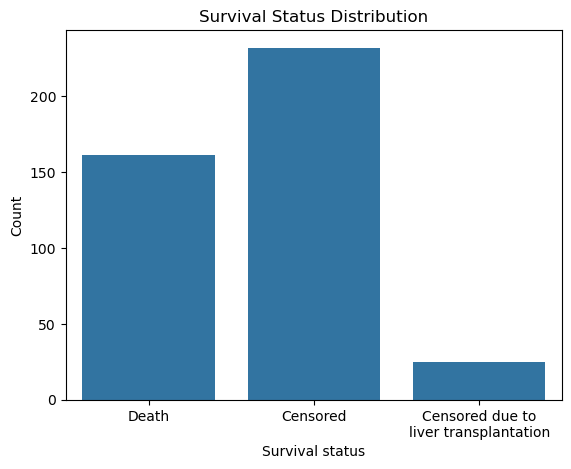

In [487]:
# Countplot for Survival Status distribution
ax = sns.countplot(x='Status', data=db)

plt.title("Survival Status Distribution")
plt.xlabel('Survival status')
plt.ylabel('Count')
ax.set_xticklabels(['Death', 'Censored', 'Censored due to\nliver transplantation'])
plt.show()


In [488]:
# Count without droping missing values
db['Drug'].value_counts(dropna=False)

Drug
D-penicillamine    158
Placebo            154
NaN                106
Name: count, dtype: int64

# Remove rows with missing values in the 'Drug' variable

As per the pre-processing dataset description

In [489]:
# Count missing values in Drug column
db['Drug'].isna().sum()

106

In [490]:
# Remove rows with missing values in the 'Drug' column
db = db[db['Drug'].notna()]

db = db.dropna(subset=['Drug'])

## Encoding

In [491]:
# Encoding Survival Status: D = 0 (Death), C = 1 (Censored), CL = 2 (Censored due to liver transplantation)
db['Status']=db['Status'].replace({'D':0, 'C':1, 'CL':2}).astype('int')
db['Status'].value_counts(dropna=False).sort_index()

/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_87369/3759696612.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Status
0    125
1    168
2     19
Name: count, dtype: int64

In [492]:
# Encoding Drug: Placebo = 0, D-penicillamine = 1
db['Drug']=db['Drug'].replace({'Placebo':0, 'D-penicillamine':1,}).astype('int')

db['Drug'].value_counts(dropna=False).sort_index()

/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_87369/3298980937.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Drug
0    154
1    158
Name: count, dtype: int64

In [493]:
# Encoding Sex as binary: M = 0 (Male), F = 1 (Female)
db['Sex']=db['Sex'].replace({'M':0, 'F':1}).astype('int')
db['Sex'].value_counts(dropna=False).sort_index()

/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_87369/354512153.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Sex
0     36
1    276
Name: count, dtype: int64

In [494]:
# Encode selected Y/N variables to binary: N = 0, Y = 1
cols_yn = ['Ascites', 'Hepatomegaly', 'Spiders'] 

db[cols_yn]=db[cols_yn].replace({'N':0, 'Y':1})
db[cols_yn] = db[cols_yn].astype(int)  # Safe cast since no missing values

db[cols_yn].apply(pd.Series.value_counts)

/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_87369/15113468.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Ascites,Hepatomegaly,Spiders
0,288,152,222
1,24,160,90


In [495]:
# Encode Edema: 
# N = 0 → No edema and no diuretic therapy for edema
# S = 1 → Edema present without diuretics, or resolved by diuretics
# Y = 2 → Edema despite diuretic therapy
db['Edema'] = db['Edema'].replace({'N': 0, 'S': 1, 'Y': 2}).astype('int')
db['Edema'].value_counts(dropna=False)


/var/folders/bq/987lp2792g18zw0p8p6y6jlh0000gn/T/ipykernel_87369/981747800.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Edema
0    263
1     29
2     20
Name: count, dtype: int64

In [496]:
# Check for missing values in Stage
print(db['Stage'].isna().sum())

# Change Stage datatype 
db['Stage'] = db['Stage'].astype('int')

0


In [497]:
# Check database info

db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombin    

## Mssing data processing 
### Removal and imputation

In [498]:
# Identify variables with missing values
missing_df = pd.DataFrame(db.isnull().mean(), columns=["Missing (%)"])
missing_df = missing_df.reset_index().rename(columns={"index": "Variable"})
missing_df = missing_df[missing_df["Missing (%)"] > 0]
missing_df

,Variable,Missing (%)
11,Cholesterol,0.089744
13,Copper,0.006410
16,Tryglicerides,0.096154
17,Platelets,0.012821


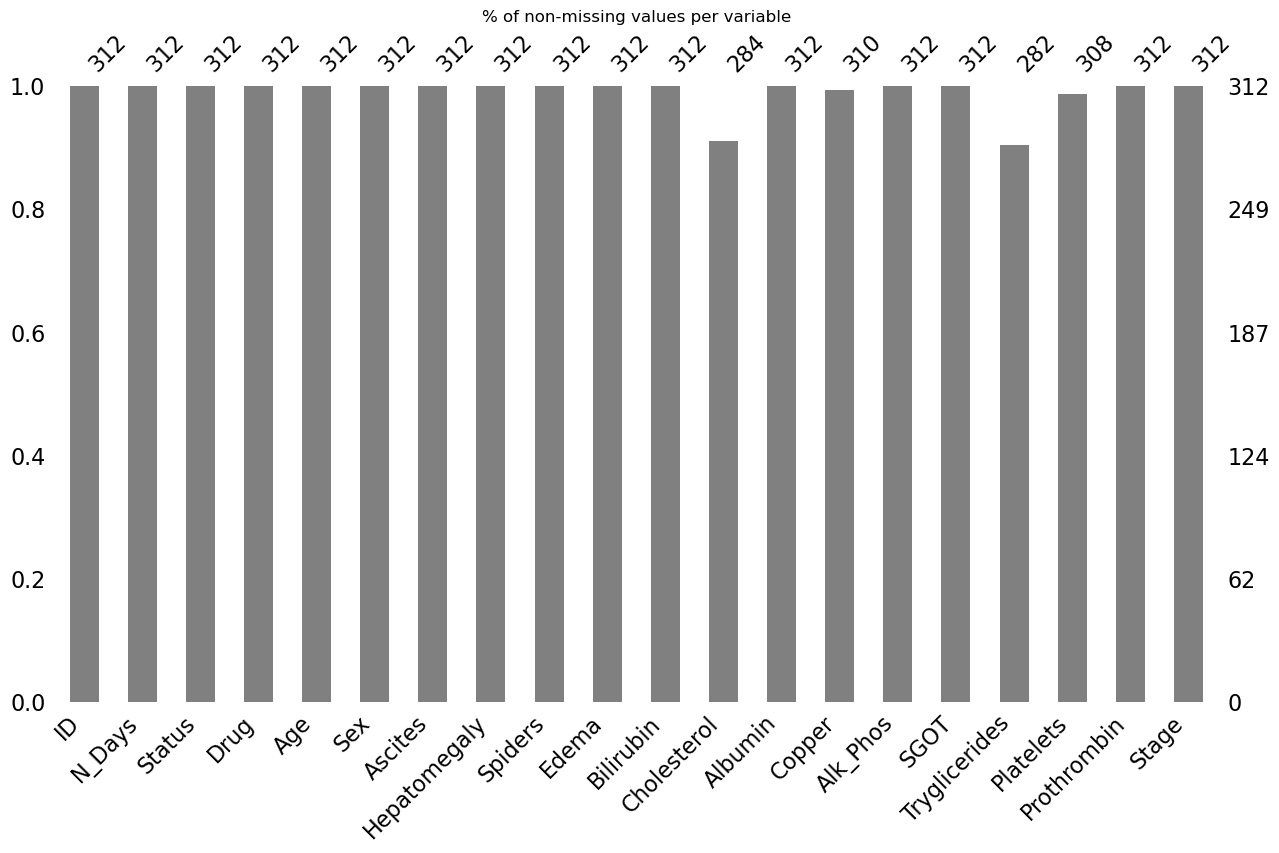

In [499]:
# Plot non-missing values per variable
import missingno as msno

msno.bar(db, figsize=(15,8), color='gray')
plt.title("% of non-missing values per variable")
plt.show()

<Axes: >

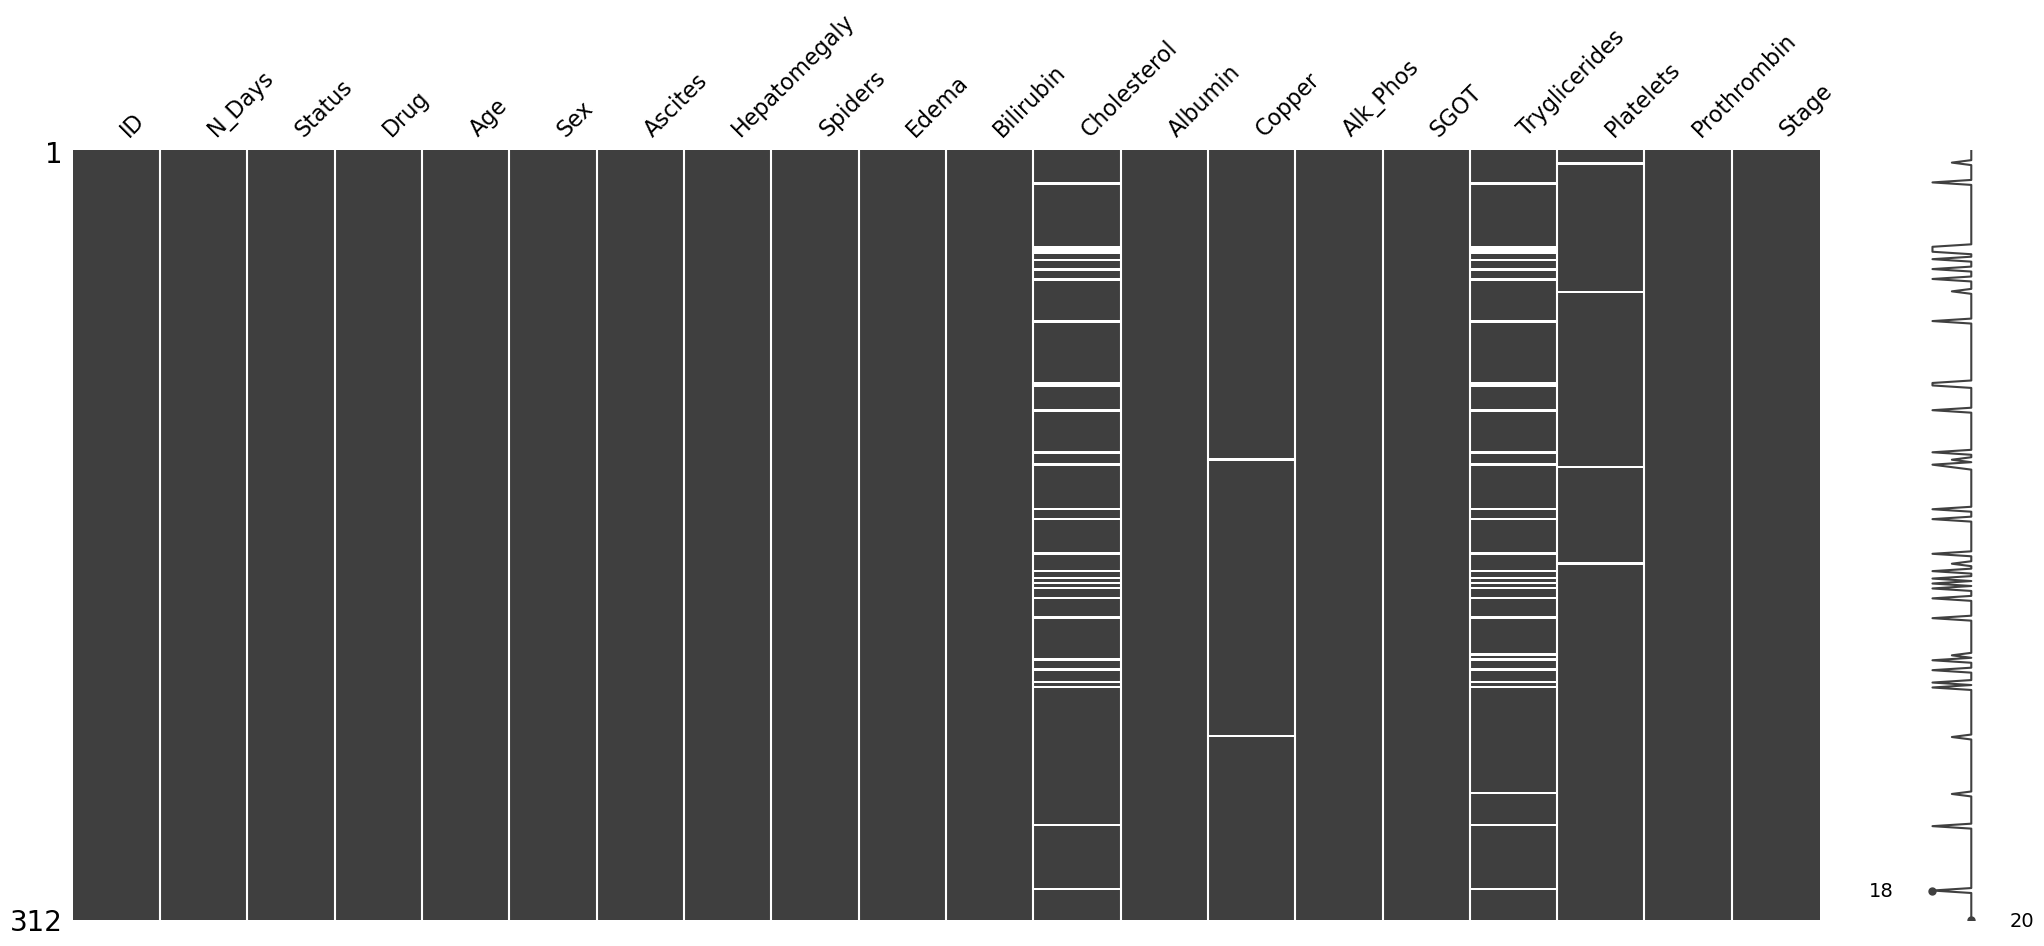

In [500]:
msno.matrix(db)

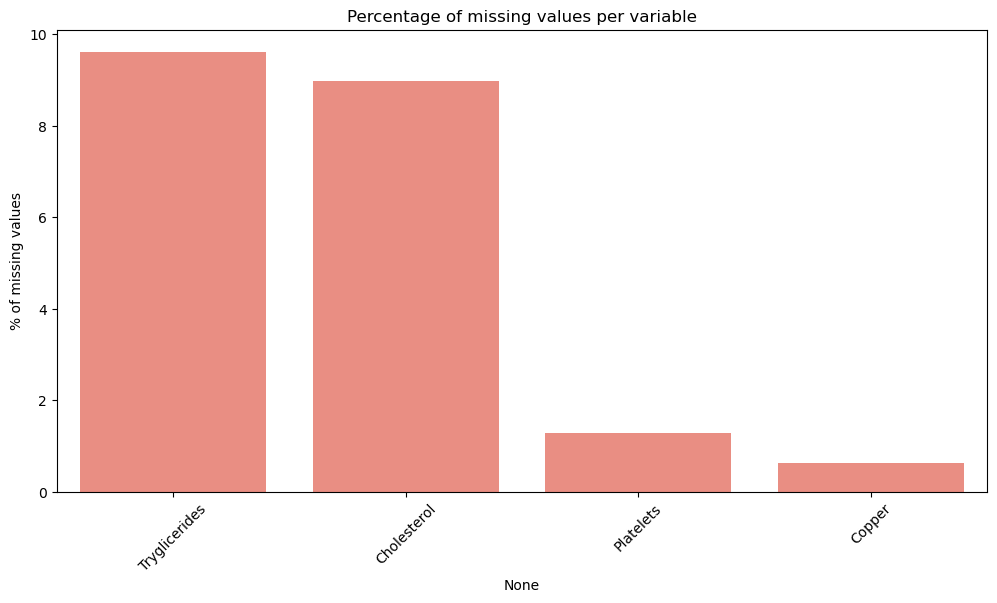

In [501]:
# Plot % of missing values per variable
missing_percent = db.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, color='salmon')
plt.ylabel("% of missing values")
plt.title("Percentage of missing values per variable")
plt.xticks(rotation=45)
plt.show()


In [502]:
# Remove variables with more than 30-40% of missing variables

# Function to drop variables with missing value percentage above a user-defined threshold
def drop_missing_vars(db, perc_missing):
    # Calculate percentage of missing values per variable
    missing_info = pd.DataFrame(db.isnull().mean(), columns=["Missing (%)"])
    
    # Filter variables with missing percentage above the threshold
    to_drop = missing_info[missing_info["Missing (%)"] >= perc_missing].reset_index()
    to_drop = to_drop.rename(columns={"index": "Variable"})
    
    # Optional: export missing info to Excel
    # to_drop.to_excel("path/missings.xlsx", index=False)
    
    print(f"\nVariables with more than {perc_missing:.0%} missing values:")
    print(to_drop)
    
    # Drop variables from the original DataFrame
    db_cleaned = db.drop(columns=to_drop["Variable"])
    
    print("\nDataFrame info after dropping variables with excessive missing values:")
    print(db_cleaned.info())
    
    # Return the cleaned DataFrame and full missing info
    return db_cleaned, missing_info


In [503]:
# Using the function to drop variables with more than 40% missing variables
db, missing_summary = drop_missing_vars(db, perc_missing=0.4)



Variables with more than 40% missing values:
Empty DataFrame
Columns: [Variable, Missing (%)]
Index: []

DataFrame info after dropping variables with excessive missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos      

In [504]:
# Impute missing values using mean for continuous variables, and mode for categorical ones

# Loop through variables with missing values
for var in missing_df["Variable"]:
    db[var] = db[var].fillna(db[var].mean())

In [505]:
# Count missing values for each variable
db.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [506]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombin    

In [507]:
# Count unique values in each variable
db.nunique() 

ID               312
N_Days           301
Status             3
Drug               2
Age              308
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         85
Cholesterol      202
Albumin          135
Copper           159
Alk_Phos         295
SGOT             179
Tryglicerides    147
Platelets        211
Prothrombin       44
Stage              4
dtype: int64

## Drop variables with more than 99% identical values (very low variance)

In [508]:
# Remove variables (columns) where more than 99% of the values are identical
# The higher the variance, the more dispersed the data is

variance = db.var()
variance

ID               8.138000e+03
N_Days           1.261760e+06
Status           3.472257e-01
Drug             2.507626e-01
Age              1.493672e+07
Sex              1.023992e-01
Ascites          7.123423e-02
Hepatomegaly     2.506390e-01
Spiders          2.059115e-01
Edema            3.014160e-01
Bilirubin        2.052376e+01
Cholesterol      4.895470e+04
Albumin          1.763093e-01
Copper           7.282607e+03
Alk_Phos         4.581264e+06
SGOT             3.214836e+03
Tryglicerides    3.834923e+03
Platelets        9.023462e+03
Prothrombin      1.008665e+00
Stage            7.706736e-01
dtype: float64

In [509]:
# Get a list of variables with more than 99% identical values (very low variance)
# Using .items() to iterate over column names and variances
low_variance_vars = [col for col, var in variance.items() if var <= 0.01]

low_variance_vars


[]

In [510]:
# Drop low-variance variables from the dataset
db = db.drop(columns=low_variance_vars)

In [511]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombin    

## Outliers

In [512]:
# Identify numerical variables for outlier detection (including Age and N_Days)
var_num = [col for col in db3.columns if db3[col].dtype == 'float64']
var_num += ['Age', 'N_Days']  # Include integer variables that are actually numeric

var_num

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Age',
 'N_Days']

In [513]:
# Confirm numerical variables
db[var_num]

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age,N_Days
0,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,21464,400
1,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,20617,4500
2,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,25594,1012
3,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,19994,1925
4,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,13918,1504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,22347,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,22347,1153
308,994,21294,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,21294,994
309,939,22767,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,22767,939
310,839,13879,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,13879,839


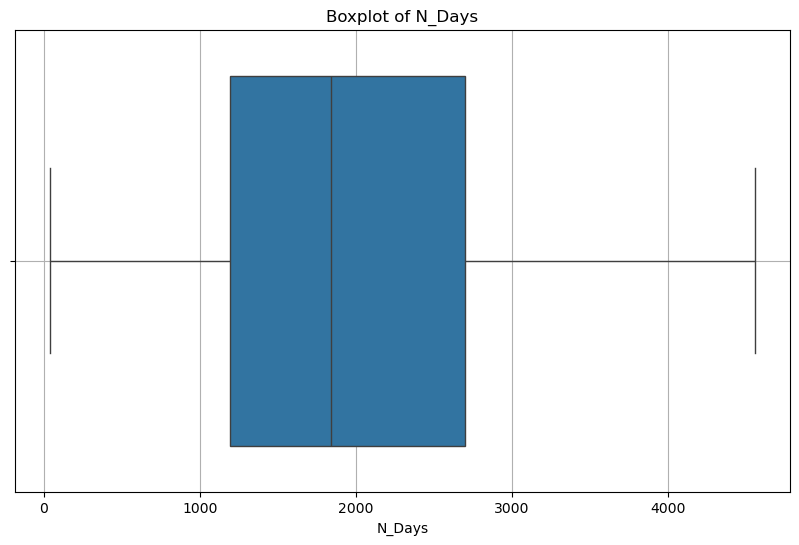

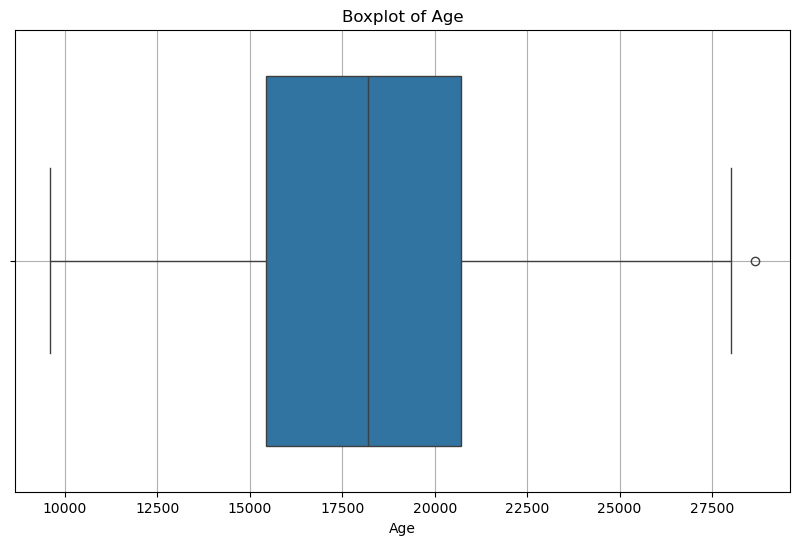

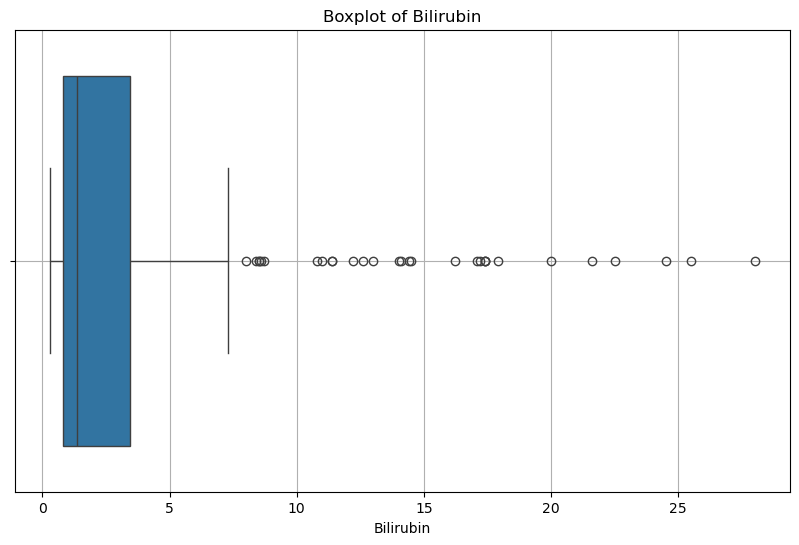

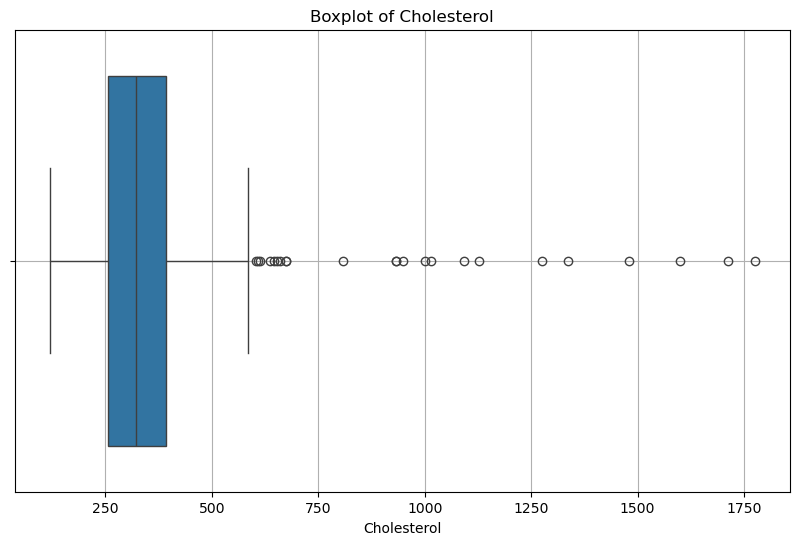

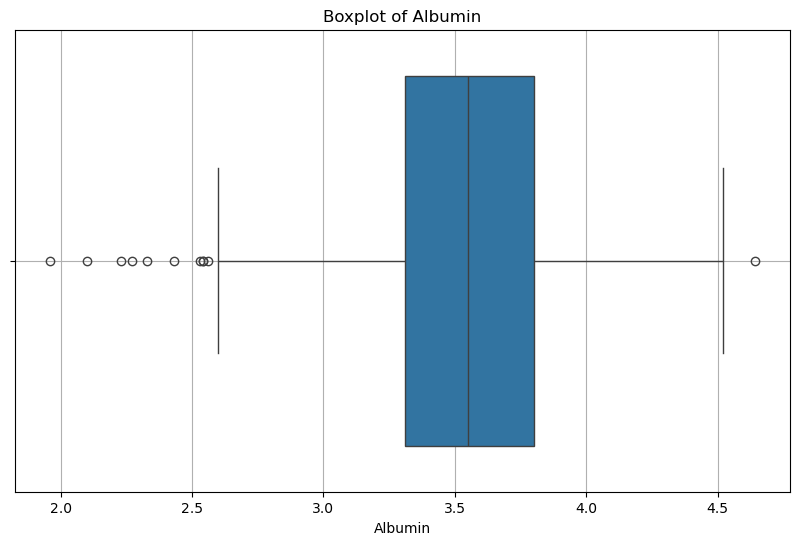

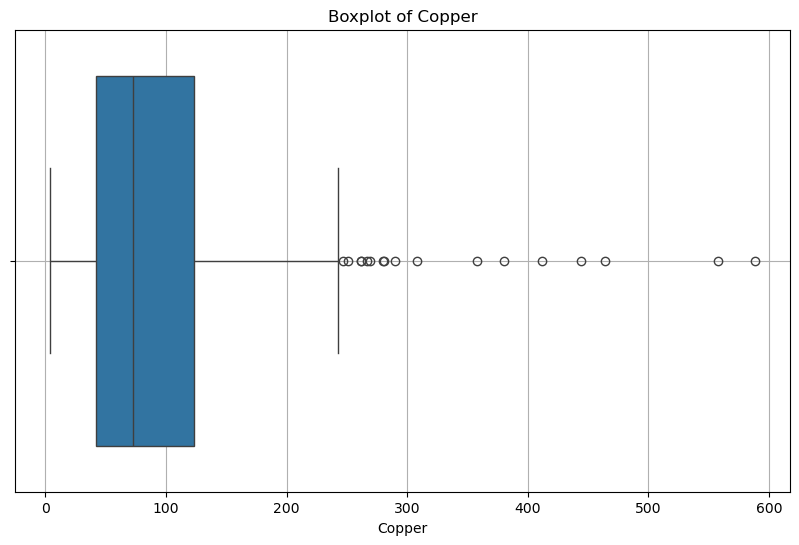

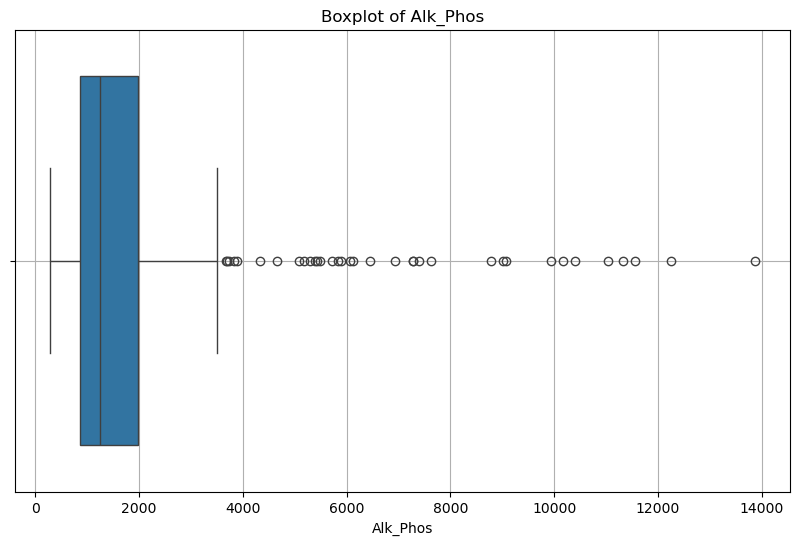

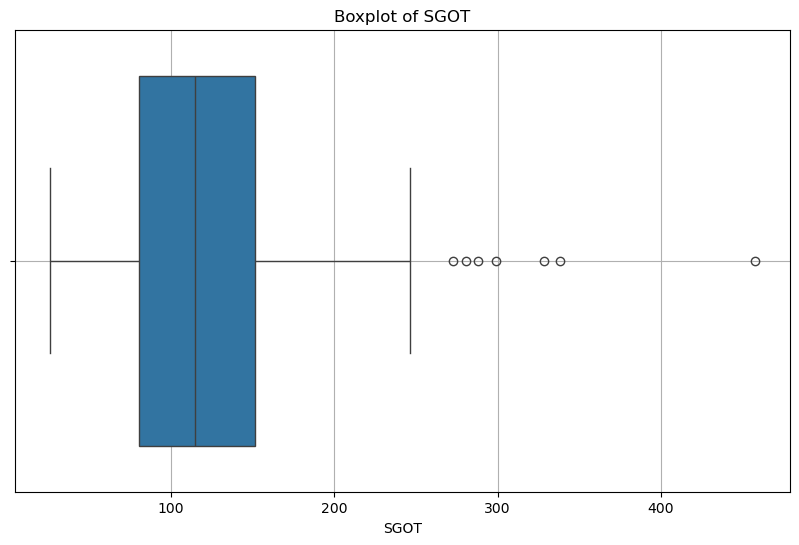

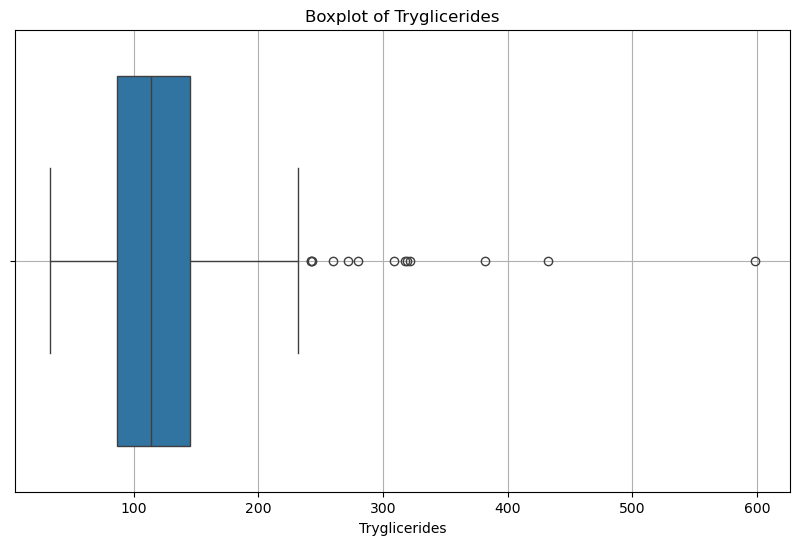

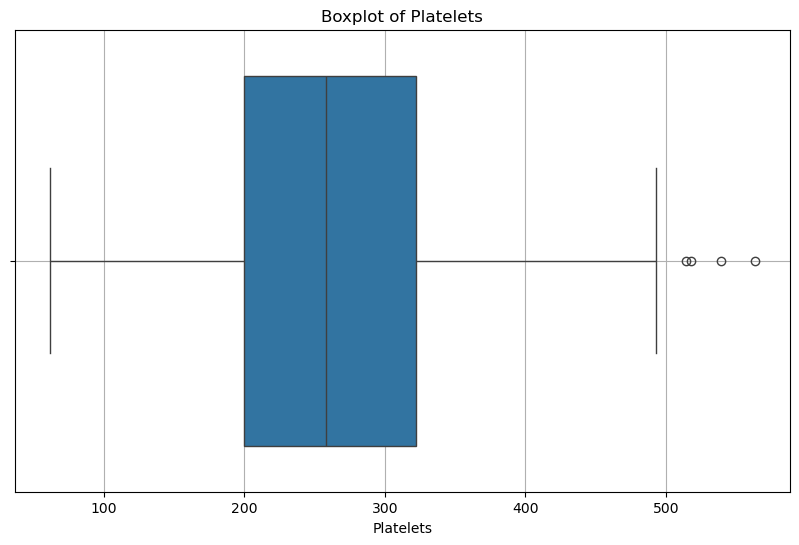

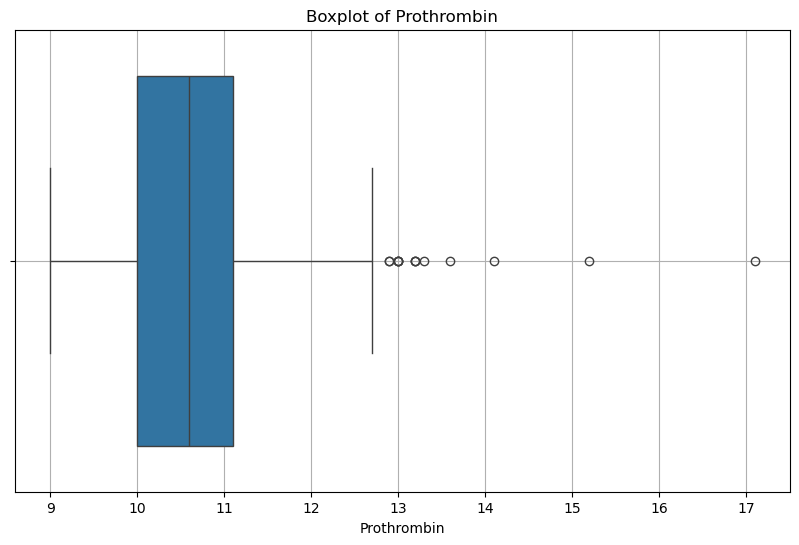

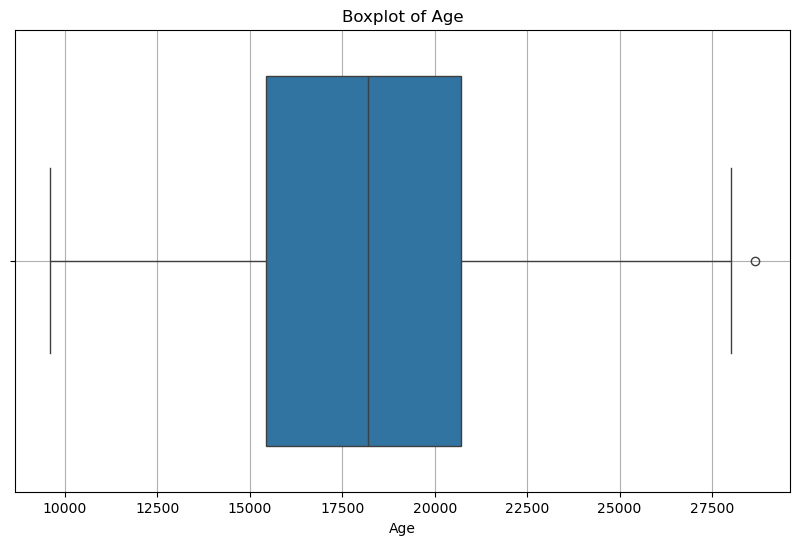

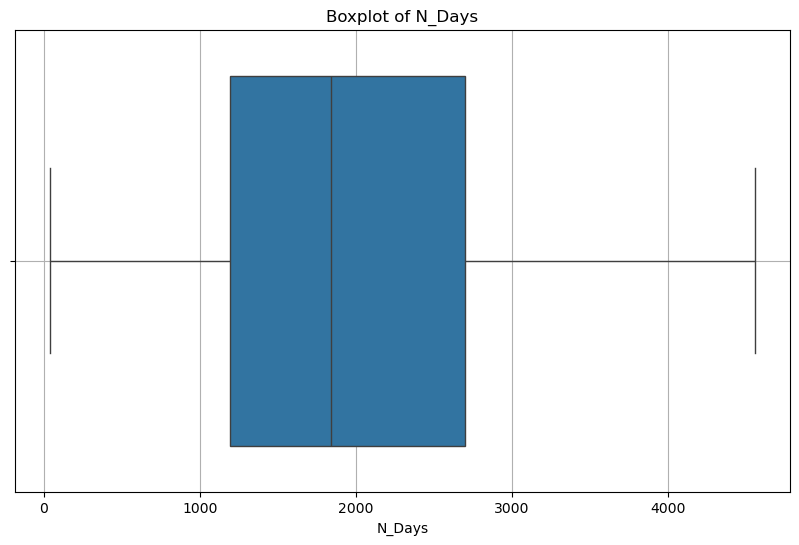

In [514]:
# Plot boxplots for each numerical variable to check for outliers (excluding NaN)
for col in db[var_num].columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=db[col].dropna())  # Drop NaN values before plotting
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

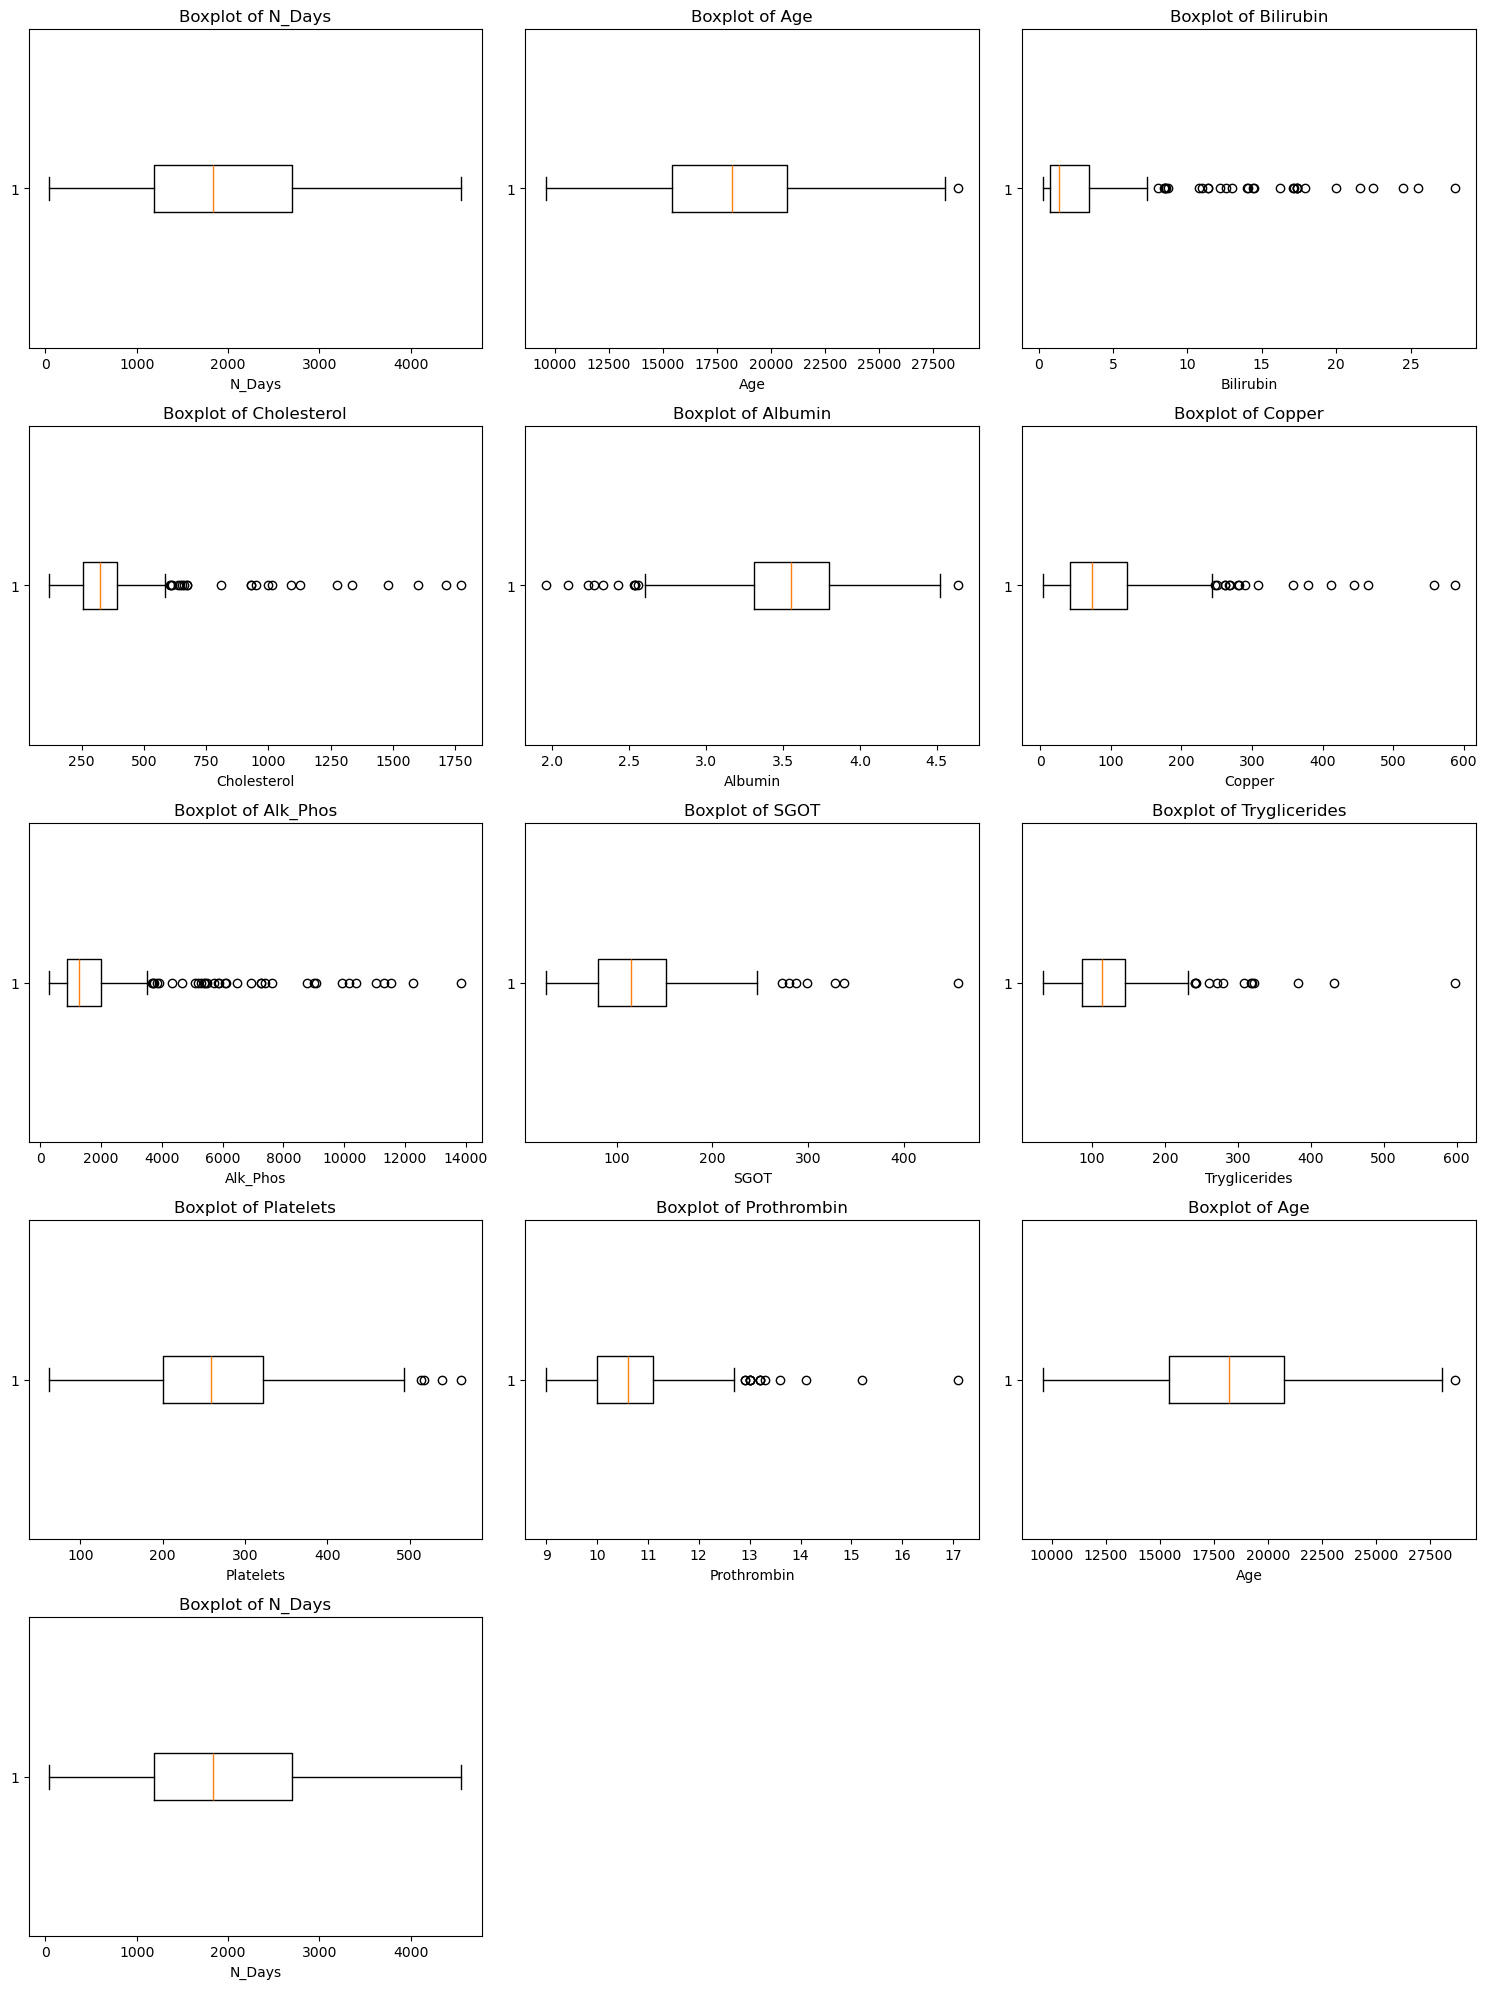

In [515]:
# Plot boxplots for each numerical variable to check for outliers (excluding NaN)
# Grid alternative

# Set number of columns per row
cols = 3  
rows = (len(var_num) + cols - 1) // cols  # Round up the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(var_num):
    axes[i].boxplot(db[col].dropna(), vert=False)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [516]:
# Descriptive statistics of numerical variables
db[var_num].describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age,N_Days
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2006.362179,18269.442308,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,18269.442308,2006.362179
std,1123.280843,3864.805407,4.530315,221.257085,0.419892,85.338190,2140.388824,56.699525,61.926753,94.991905,1.004323,3864.805407,1123.280843
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,9598.000000,41.000000
25%,1191.000000,15427.750000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,15427.750000,1191.000000
50%,1839.500000,18187.500000,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,258.500000,10.600000,18187.500000,1839.500000
75%,2697.250000,20715.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,20715.000000,2697.250000
max,4556.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,28650.000000,4556.000000


In [517]:
# Calculate the IQR and identify outliers for each numerical variable
for col in db[var_num]:
    q1 = np.percentile(db[col].dropna(), 25)
    q3 = np.percentile(db[col].dropna(), 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    print(f"--- {col} ---")
    print(f"Q1: {q1:.2f}, Q3: {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower limit: {lower_limit:.2f}")
    print(f"Upper limit: {upper_limit:.2f}")
    print(f"Outliers below lower limit: {(db[col] < lower_limit).sum()}")
    print(f"Outliers above upper limit: {(db[col] > upper_limit).sum()}\n")

--- N_Days ---
Q1: 1191.00, Q3: 2697.25
IQR: 1506.25
Lower limit: -1068.38
Upper limit: 4956.62
Outliers below lower limit: 0
Outliers above upper limit: 0

--- Age ---
Q1: 15427.75, Q3: 20715.00
IQR: 5287.25
Lower limit: 7496.88
Upper limit: 28645.88
Outliers below lower limit: 0
Outliers above upper limit: 1

--- Bilirubin ---
Q1: 0.80, Q3: 3.42
IQR: 2.62
Lower limit: -3.14
Upper limit: 7.36
Outliers below lower limit: 0
Outliers above upper limit: 30

--- Cholesterol ---
Q1: 255.75, Q3: 392.25
IQR: 136.50
Lower limit: 51.00
Upper limit: 597.00
Outliers below lower limit: 0
Outliers above upper limit: 23

--- Albumin ---
Q1: 3.31, Q3: 3.80
IQR: 0.49
Lower limit: 2.58
Upper limit: 4.53
Outliers below lower limit: 10
Outliers above upper limit: 1

--- Copper ---
Q1: 41.75, Q3: 123.00
IQR: 81.25
Lower limit: -80.12
Upper limit: 244.88
Outliers below lower limit: 0
Outliers above upper limit: 17

--- Alk_Phos ---
Q1: 871.50, Q3: 1980.00
IQR: 1108.50
Lower limit: -791.25
Upper limit: 3642

In [518]:
# Remove outliers based on IQR for each numerical variable
db2 = db.copy()  # Make a full copy of the original dataset

for col in var_num:
    q1 = np.percentile(db2[col].dropna(), 25)
    q3 = np.percentile(db2[col].dropna(), 75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    db2 = db2[(db2[col] >= lower_limit) & (db2[col] <= upper_limit)]


In [519]:
# Check dataset without outliers based on IQR
db2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
4,5,1504,2,0,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.000000,10.9,3
5,6,2503,0,0,24201,1,0,1,0,0,0.8,248.0,3.98,50.0,944.0,93.00,63.0,261.935065,11.0,3
10,11,3762,0,0,19619,1,0,1,1,0,1.4,259.0,4.16,46.0,1104.0,79.05,79.0,258.000000,12.0,4
12,13,3577,1,0,16688,1,0,0,0,0,0.7,281.0,3.85,40.0,1181.0,88.35,130.0,244.000000,10.6,3
15,16,3672,1,0,14772,1,0,0,0,0,0.7,204.0,3.66,28.0,685.0,72.85,58.0,198.000000,10.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,307,1149,1,0,11167,1,0,0,0,0,0.8,273.0,3.56,52.0,1282.0,130.00,59.0,344.000000,10.5,2
307,308,1153,1,1,22347,1,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.000000,10.4,2
308,309,994,1,0,21294,1,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.000000,10.8,2
309,310,939,1,1,22767,1,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.000000,10.2,2


In [520]:
# Descriptive statistics of the numerical variables without outliers based on IQR
db2[var_num].describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age,N_Days
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.00000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2187.174157,17768.011236,1.564045,306.717301,3.600449,63.748858,1195.561798,111.84382,103.306957,257.881293,10.445506,17768.011236,2187.174157
std,963.787378,3759.859796,1.373292,78.368299,0.334723,40.412226,509.115117,41.60643,33.242552,85.043208,0.669688,3759.859796,963.787378
min,110.000000,9598.000000,0.300000,120.000000,2.750000,4.000000,289.000000,41.85000,33.000000,79.000000,9.000000,9598.000000,110.000000
25%,1434.250000,14833.750000,0.700000,248.750000,3.362500,35.250000,805.500000,79.05000,78.250000,200.250000,9.925000,14833.750000,1434.250000
50%,2170.500000,17807.500000,1.100000,300.500000,3.595000,55.000000,1104.500000,107.72500,102.000000,254.000000,10.300000,17807.500000,2170.500000
75%,2796.750000,20286.000000,1.975000,369.510563,3.827500,81.000000,1548.750000,137.95000,124.702128,311.750000,10.900000,20286.000000,2796.750000
max,4232.000000,28018.000000,6.800000,528.000000,4.520000,188.000000,2769.000000,221.65000,193.000000,474.000000,12.200000,28018.000000,4232.000000


In [521]:
# Replace outlier values with IQR-based lower and upper limits
db3 = db.copy()

for col in var_num:
    q1 = np.percentile(db[col].dropna(), 25)
    q3 = np.percentile(db[col].dropna(), 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Replace values below lower limit with lower limit
    db3[col] = np.where(db[col] < lower_limit, lower_limit, db3[col])
    
    # Replace values above upper limit with upper limit
    db3[col] = np.where(db[col] > upper_limit, upper_limit, db3[col])

# Check distribution of the target variable
print(db3['Status'].value_counts())


Status
1    168
0    125
2     19
Name: count, dtype: int64


## Univariate analysis
Using db3 dataset - outliers replaced with IQR-based lower and upper limits

In [522]:
# Updated dataset info
db3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    float64
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    float64
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombin    

In [523]:
# Descriptive statistics of the dataset with outliers replaced with IQR-based lower and upper limits
db3.describe()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,156.500000,2006.362179,0.660256,0.506410,18269.429087,0.884615,0.076923,0.512821,0.288462,0.221154,2.512740,340.430435,3.526907,92.013371,1591.000801,121.106346,120.872400,261.569680,10.686538,3.032051
std,90.210864,1123.280843,0.589259,0.500762,3864.769789,0.319999,0.266897,0.500639,0.453775,0.549014,2.299893,115.214642,0.398631,66.240397,955.892313,51.417461,47.483824,93.966989,0.869543,0.877880
min,1.000000,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,2.575000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,0.000000,0.000000,15427.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,156.500000,1839.500000,1.000000,1.000000,18187.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,258.500000,10.600000,3.000000
75%,234.250000,2697.250000,1.000000,1.000000,20715.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000
max,312.000000,4556.000000,2.000000,1.000000,28645.875000,1.000000,1.000000,1.000000,1.000000,2.000000,7.362500,597.000000,4.535000,244.875000,3642.750000,258.850000,232.625000,505.000000,12.750000,4.000000


In [524]:
# Identify continuous numerical variables (float64), excluding 'ID'
numeric_vars = [col for col in db3.columns if db3[col].dtype == 'float64']

# Identify discrete/categorical variables (int64 with few unique values), excluding 'ID'
categorical_vars = [col for col in db3.columns if db3[col].dtype == 'int64' and db3[col].nunique() <= 10 and col != 'ID']

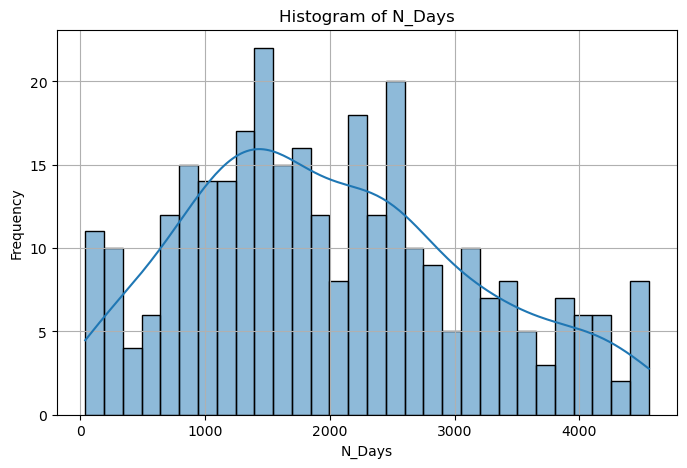

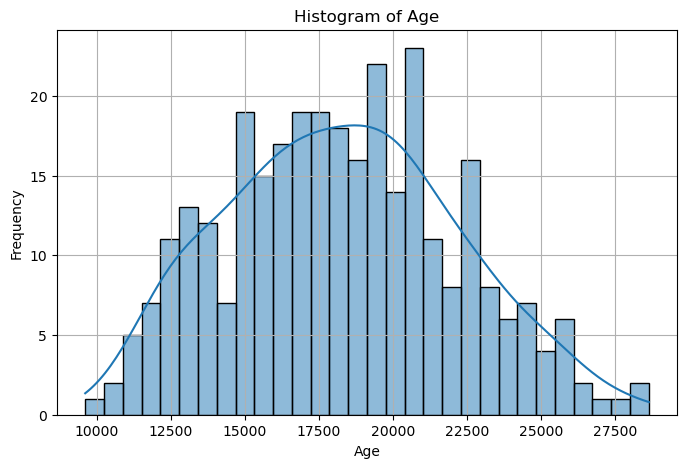

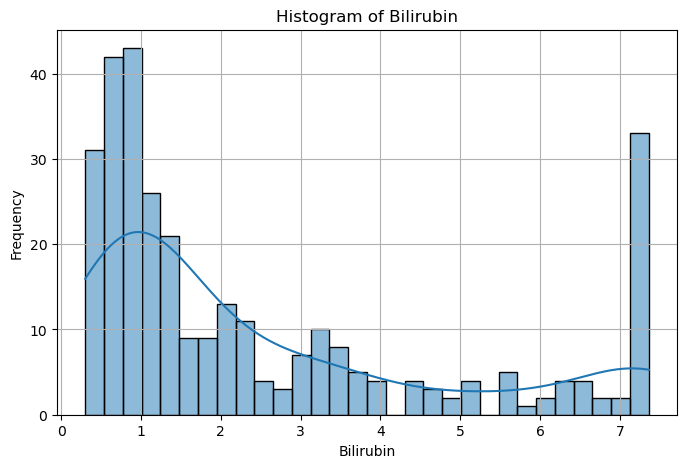

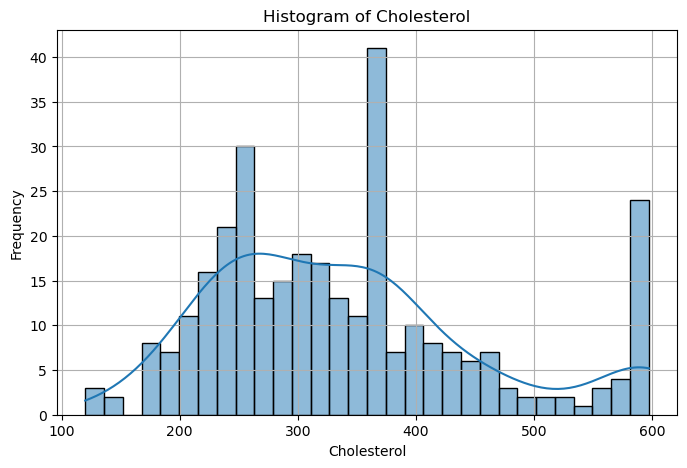

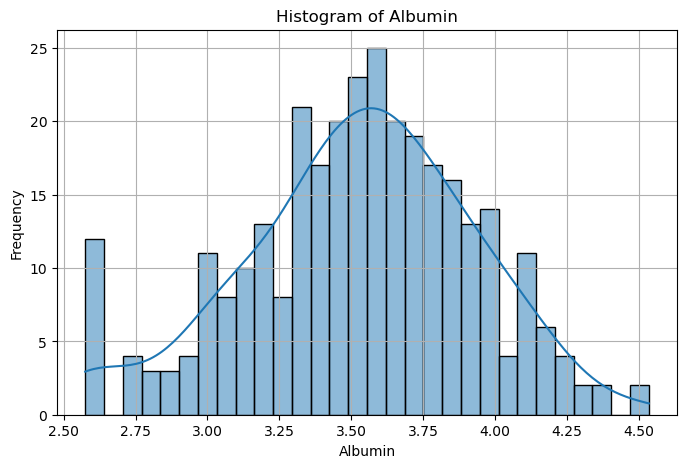

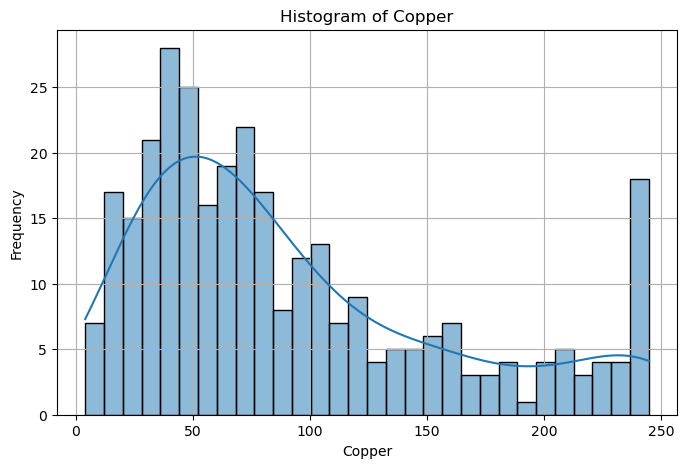

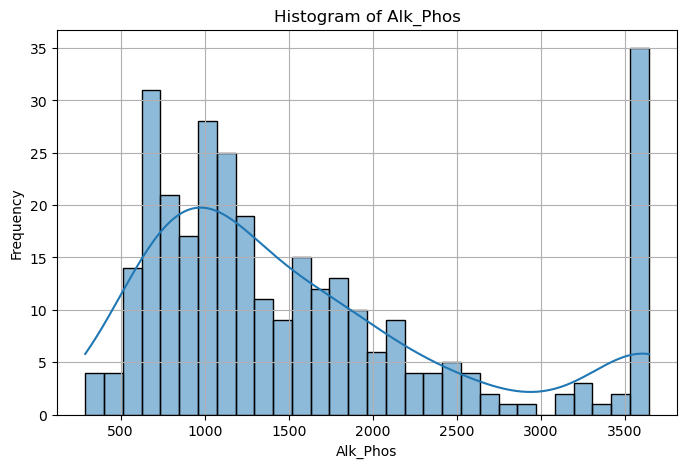

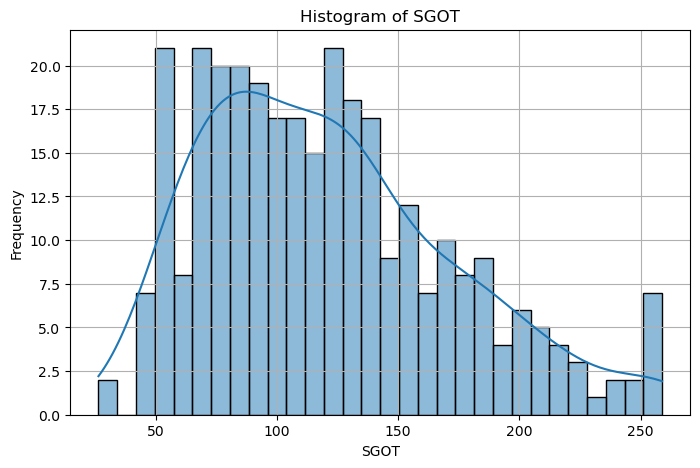

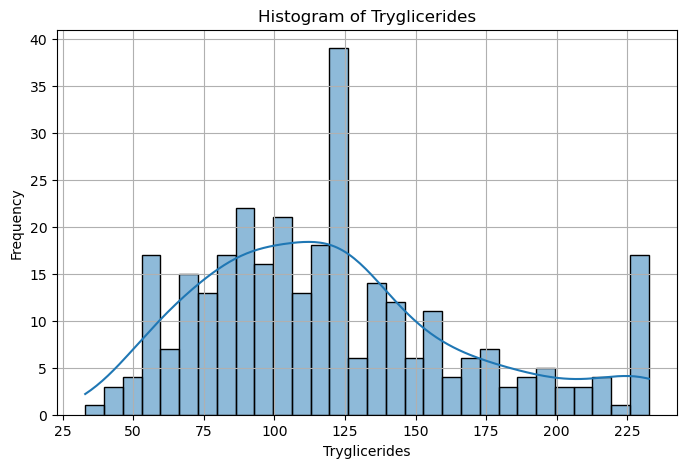

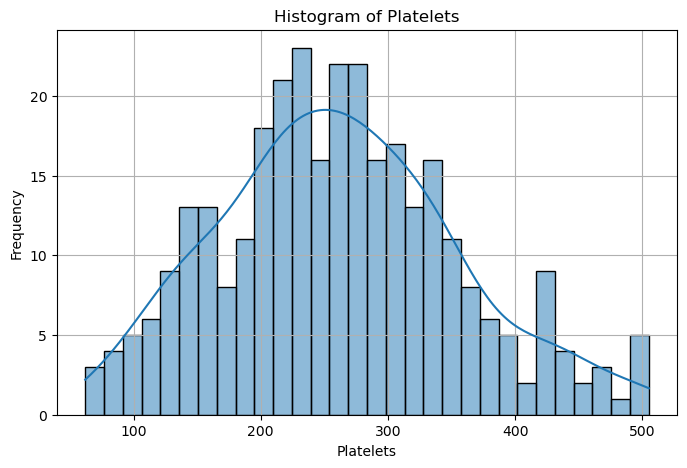

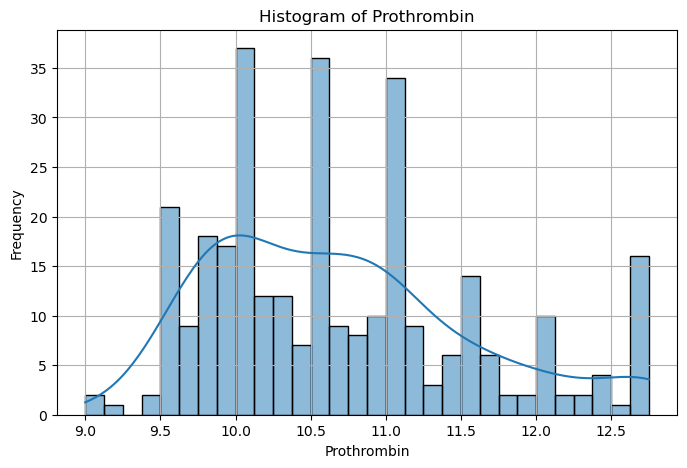

In [525]:
# Histograms for continuous variables
for col in numeric_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(db3[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

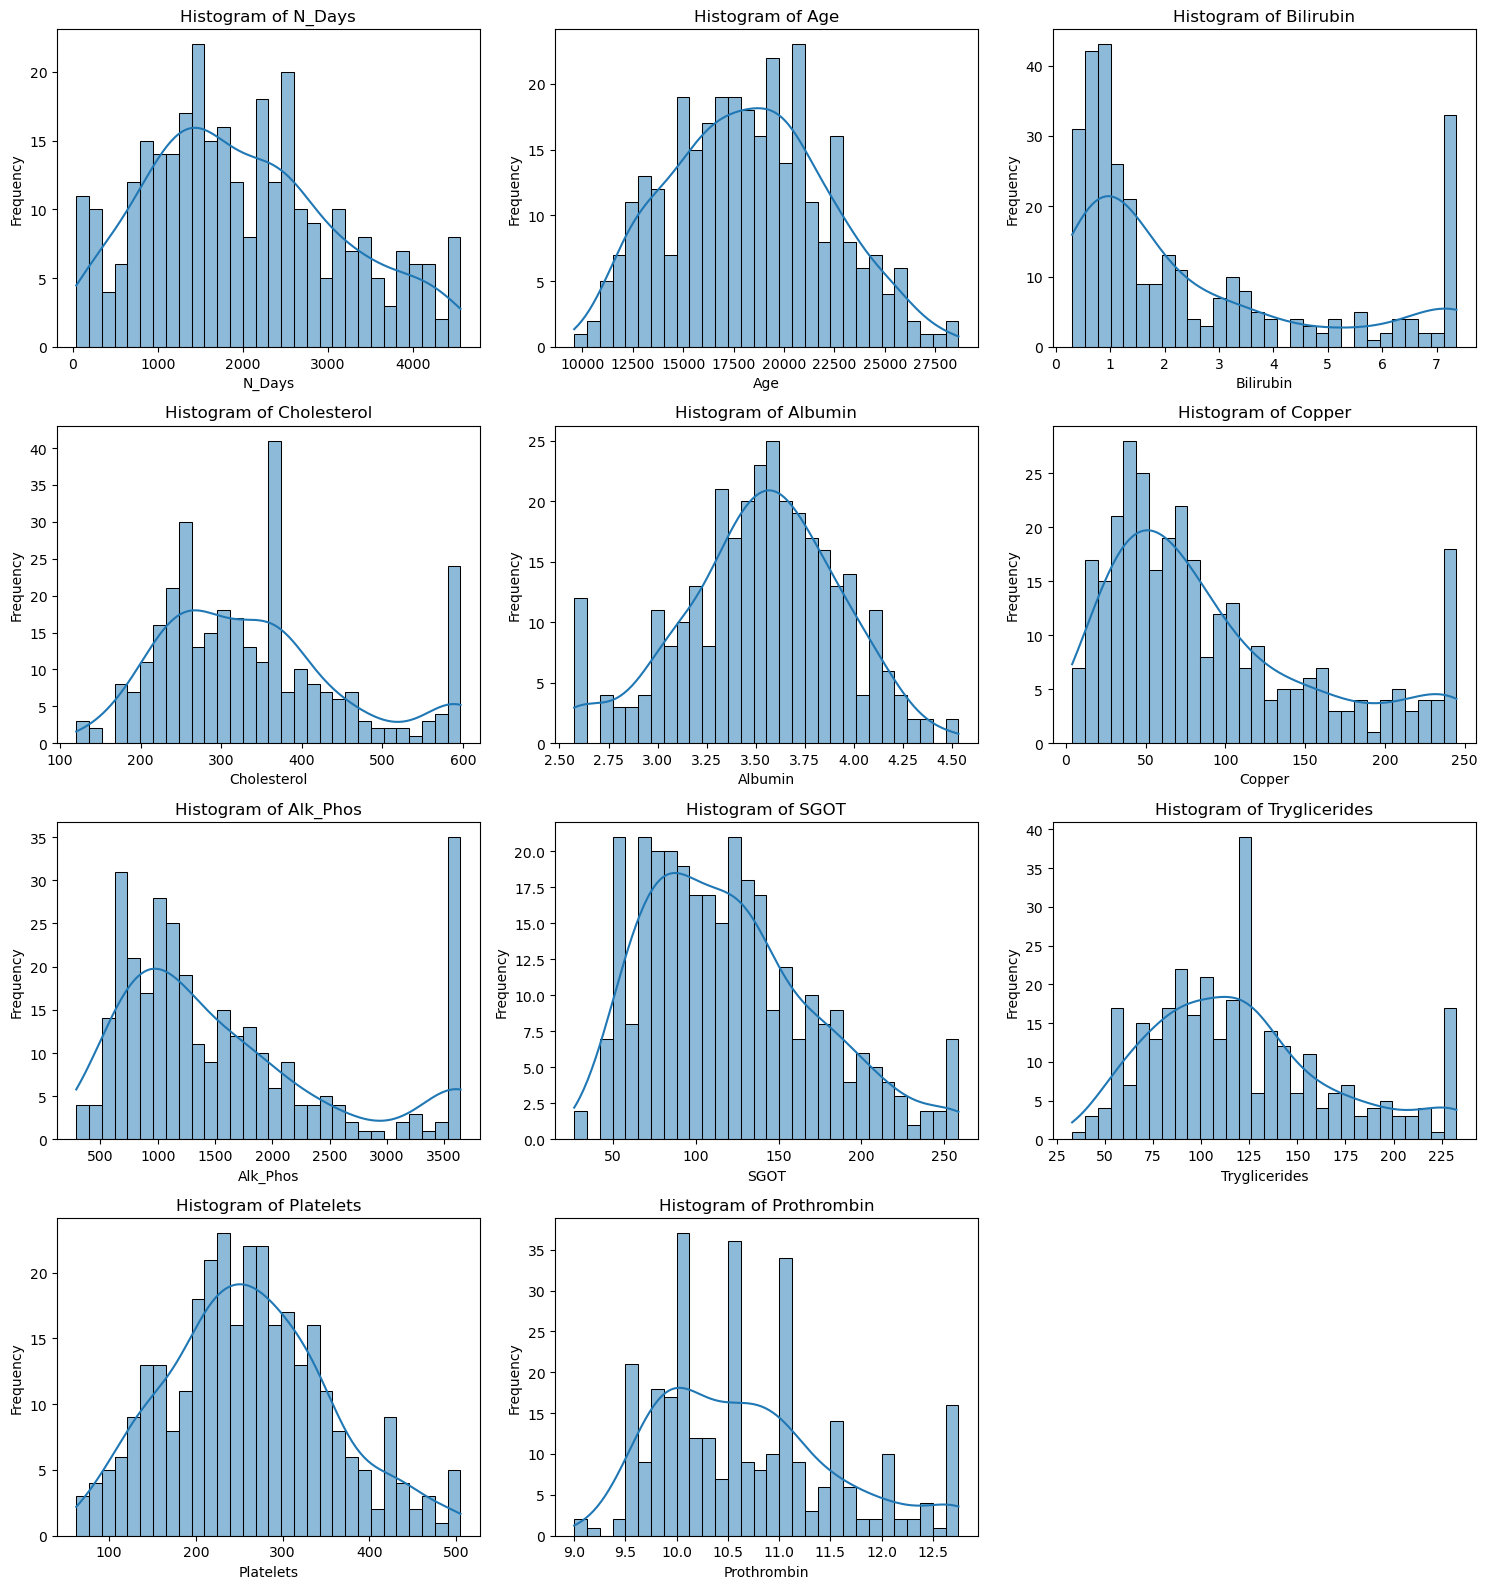

In [526]:
# Alternative: Grid of histograms for continuous (float) variables
import math

cols = 3  # number of plots per row
rows = math.ceil(len(numeric_vars) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    sns.histplot(db3[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

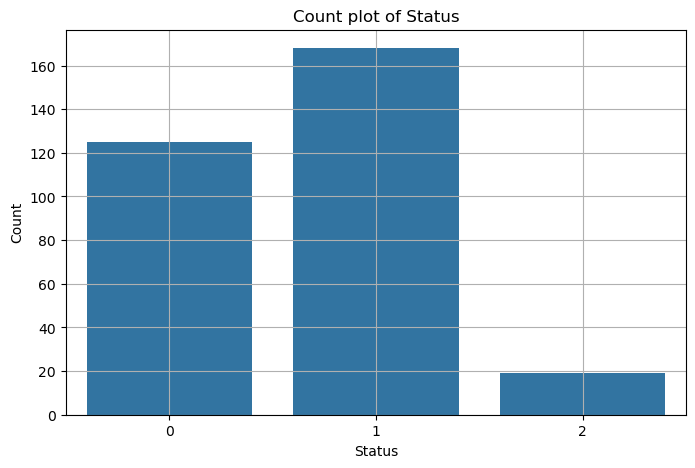

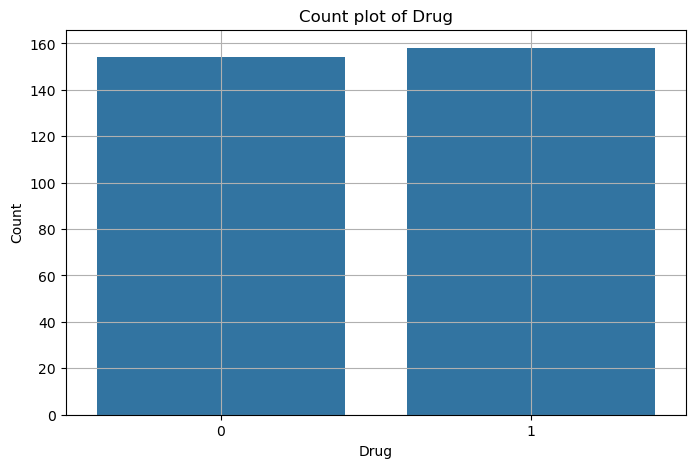

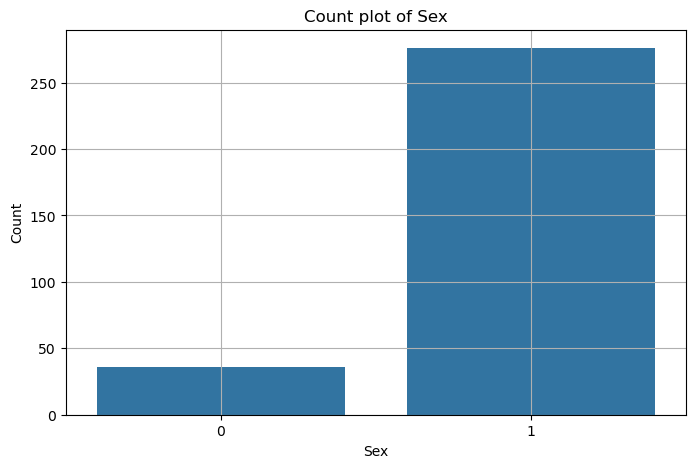

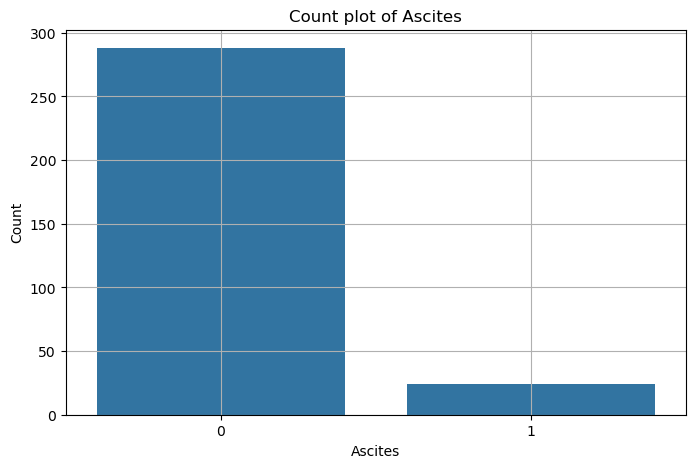

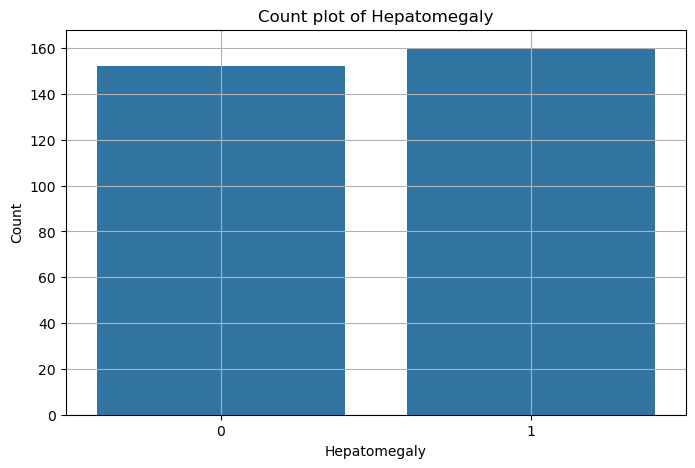

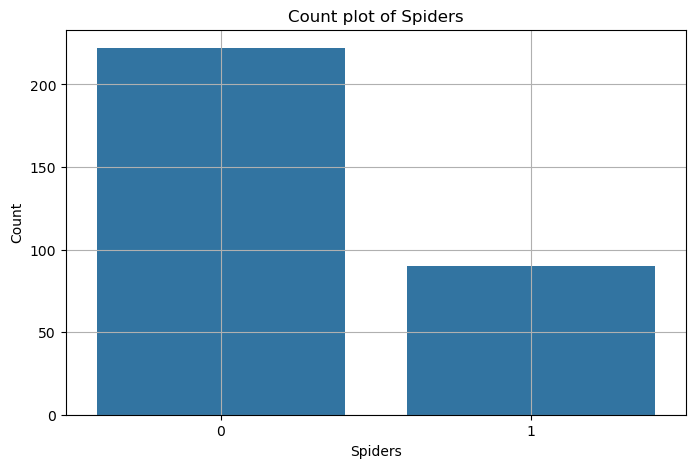

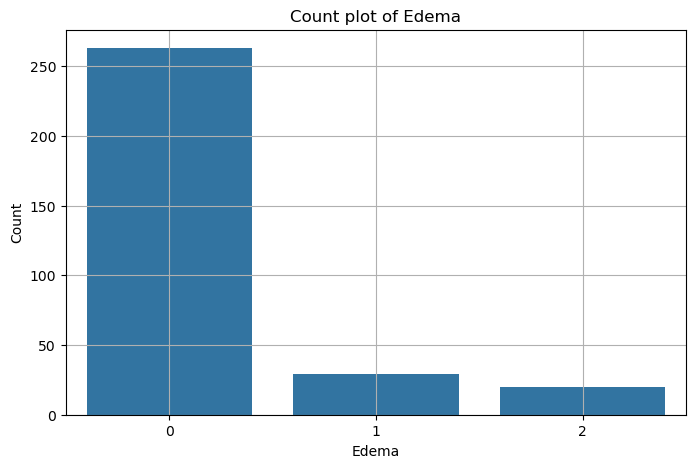

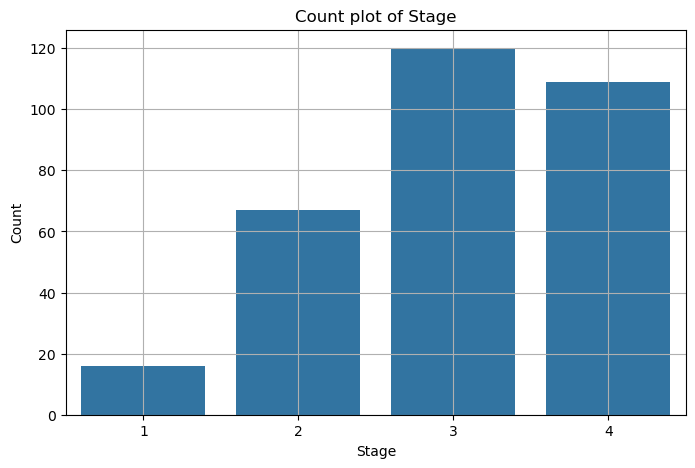

In [527]:
# Count plots for categorical/discrete variables
for col in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=db3[col])
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

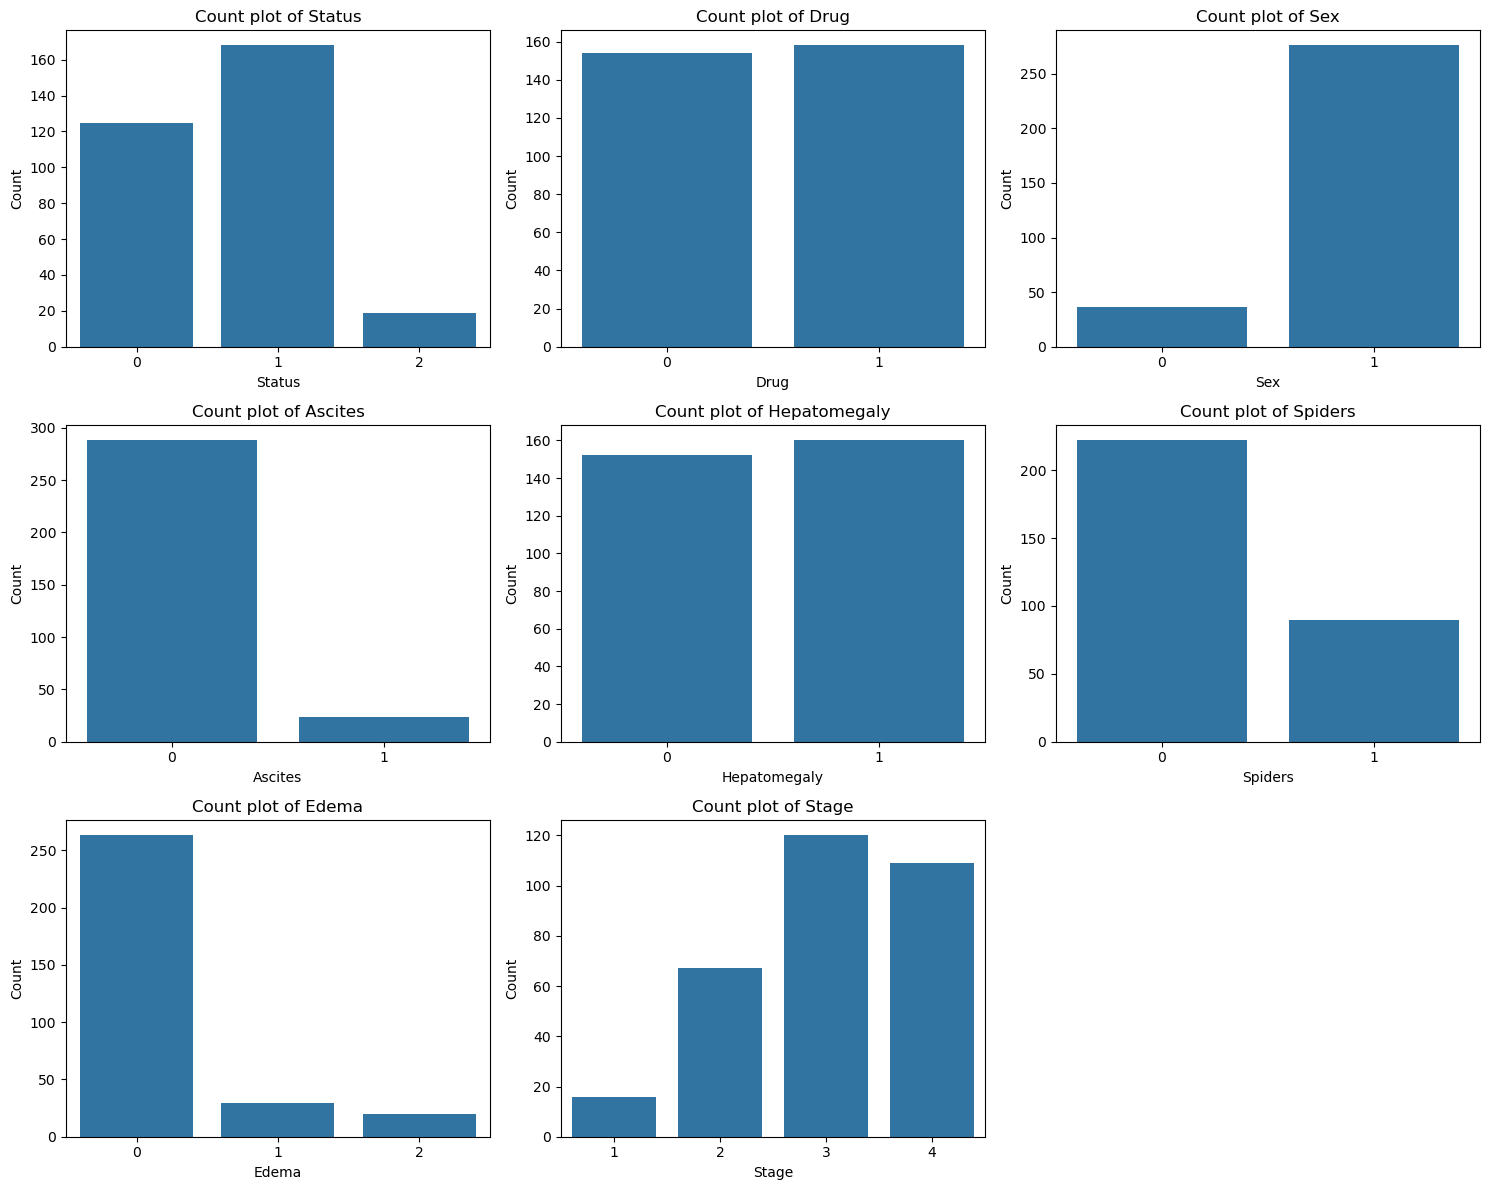

In [528]:
# Alternative: Grid of count plots for categorical/discrete variables
cols = 3
rows = math.ceil(len(categorical_vars) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(x=db3[col], ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Análise bivariada

In [529]:
# Get categorical variables excluding Status
var_int = [col for col in categorical_vars if col != 'Status']
var_int

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

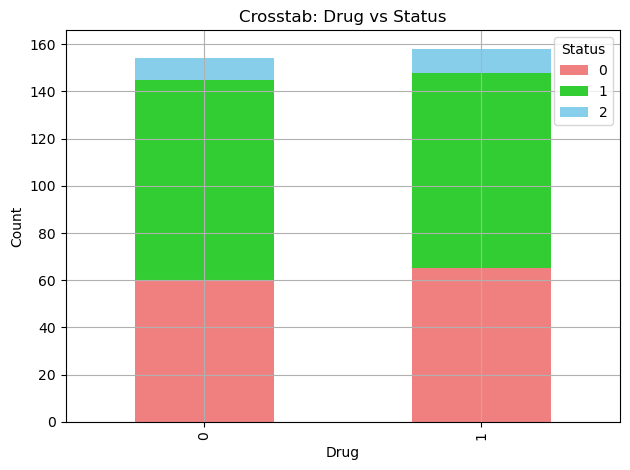

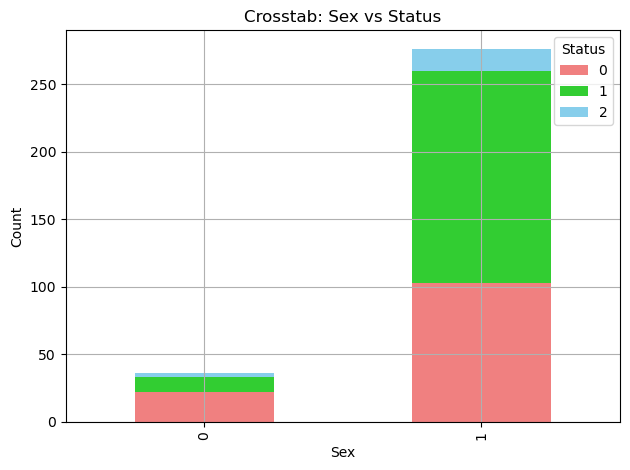

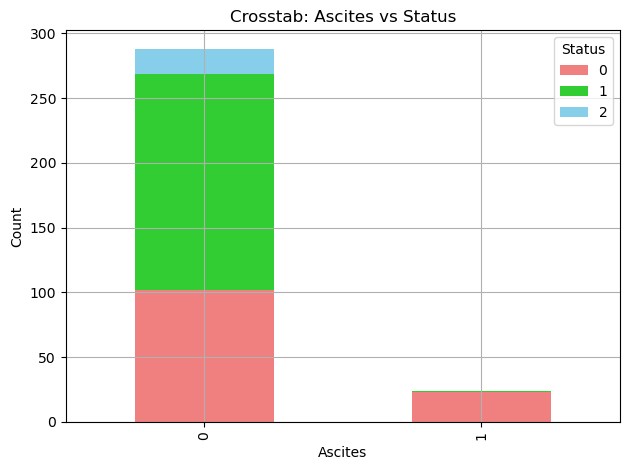

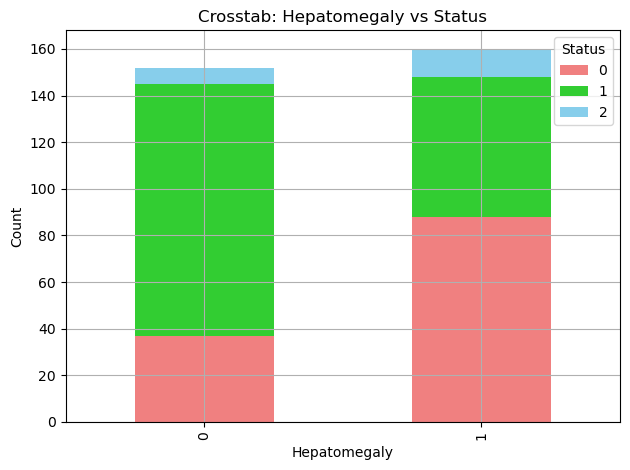

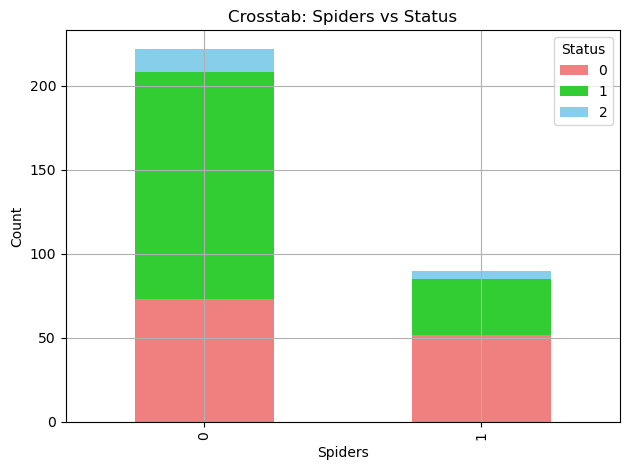

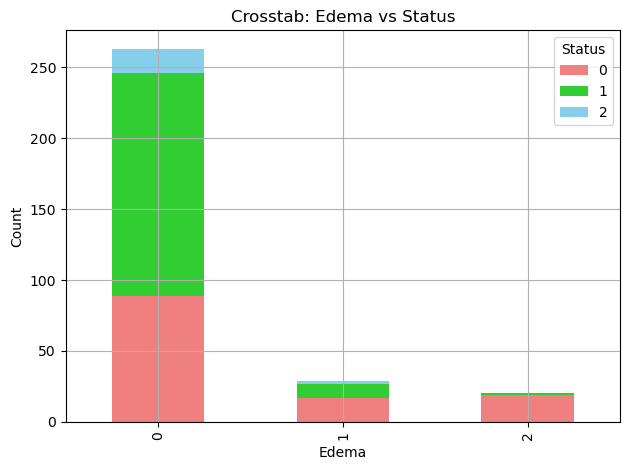

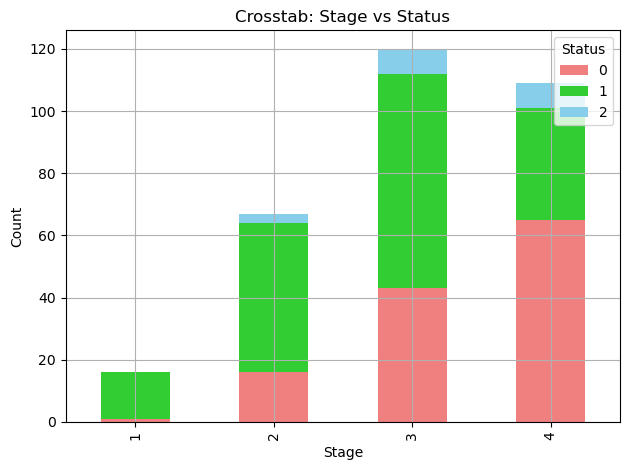

In [530]:
# Plot crosstabs between each variable and the target
for col in var_int:
    df_crosstab = pd.crosstab(db3[col], db3['Status'])  # rows = predictor, columns = target
    df_crosstab.plot(kind='bar', stacked=True, color=['lightcoral', 'limegreen', 'skyblue'])  # adjust colors if Status has 3 levels
    plt.title(f'Crosstab: {col} vs Status')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.legend(title='Status', loc='upper right')
    plt.tight_layout()
    plt.show()

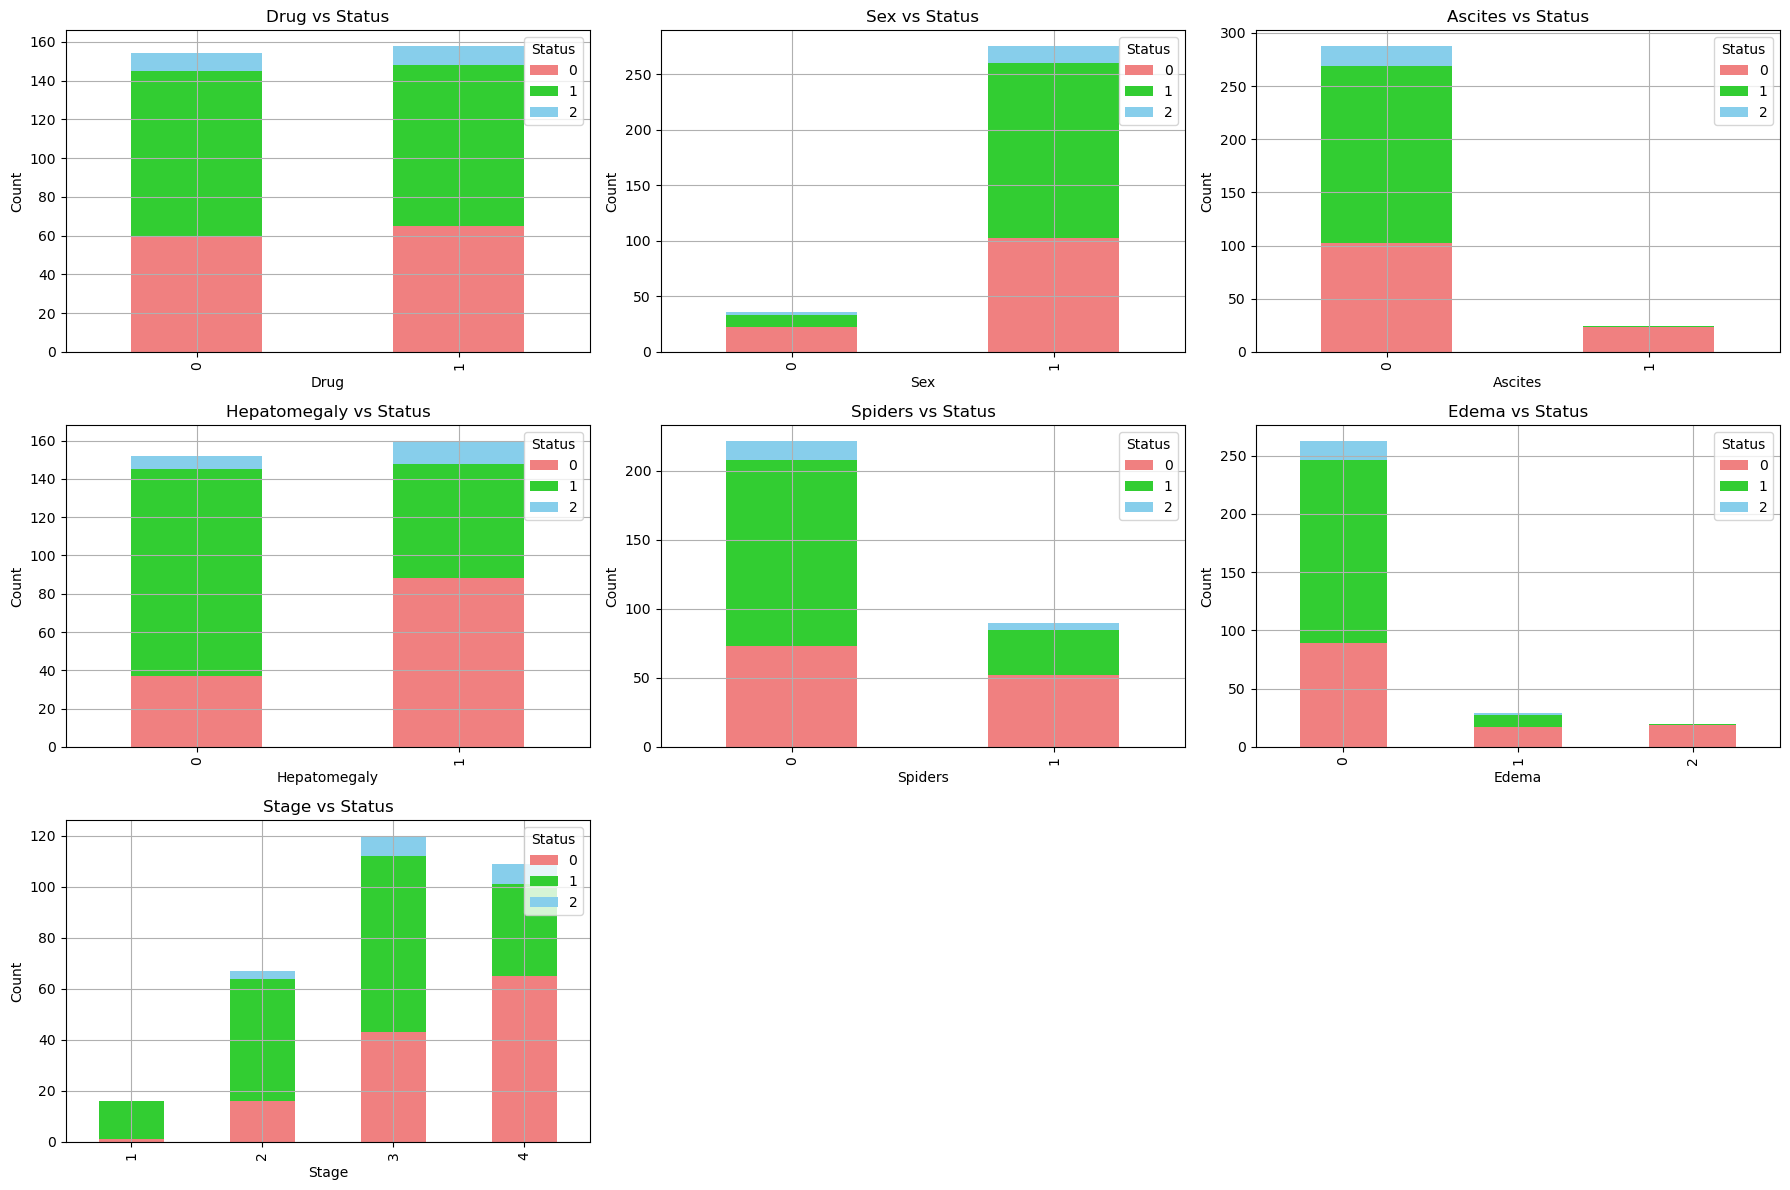

In [531]:
# Alternative: Grid of stacked bar charts (crosstabs) for categorical variables
cols = 3  # Number of plots per row
rows = math.ceil(len(var_int) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

# Generate crosstabs and plot in grid
for i, col in enumerate(var_int):
    crosstab = pd.crosstab(db3[col], db3['Status'])
    crosstab.plot(kind='bar', stacked=True, ax=axes[i],
                  color=['lightcoral', 'limegreen', 'skyblue'])

    axes[i].set_title(f'{col} vs Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Status', loc='upper right')
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [532]:
# Define numeric variables excluding Status 
var_num = [var for var in numeric_vars if var != 'Status']
var_num

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

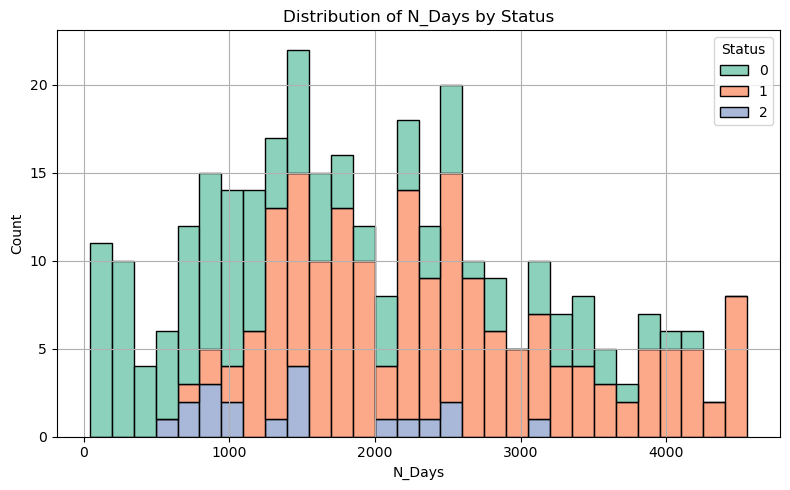

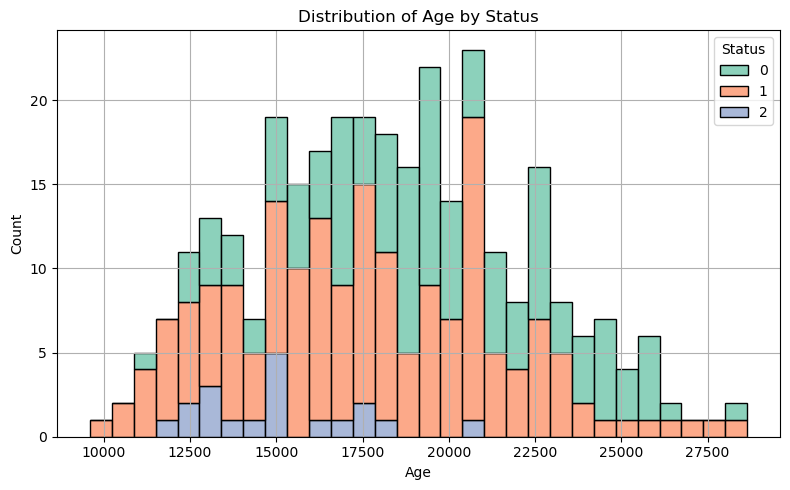

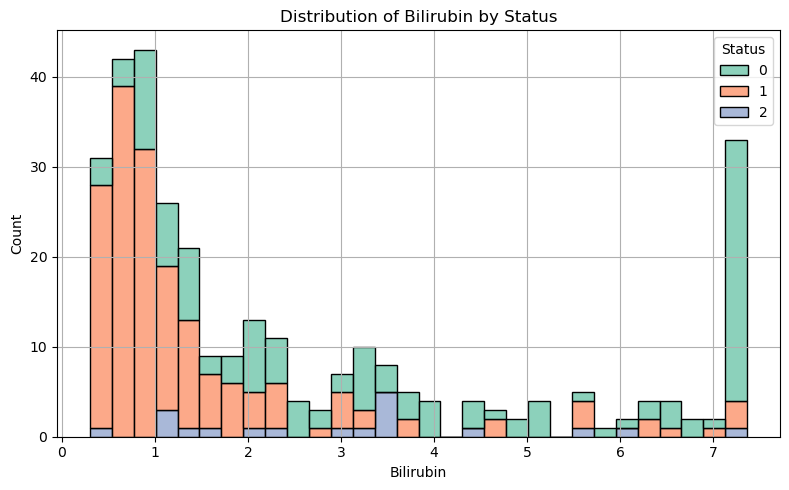

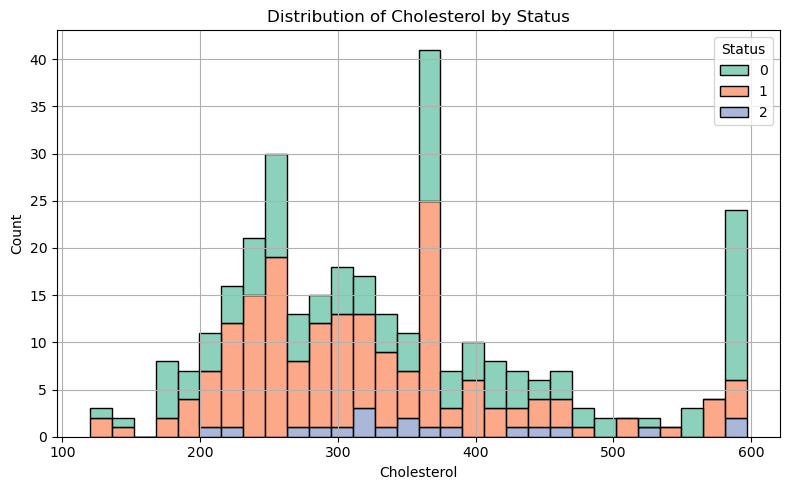

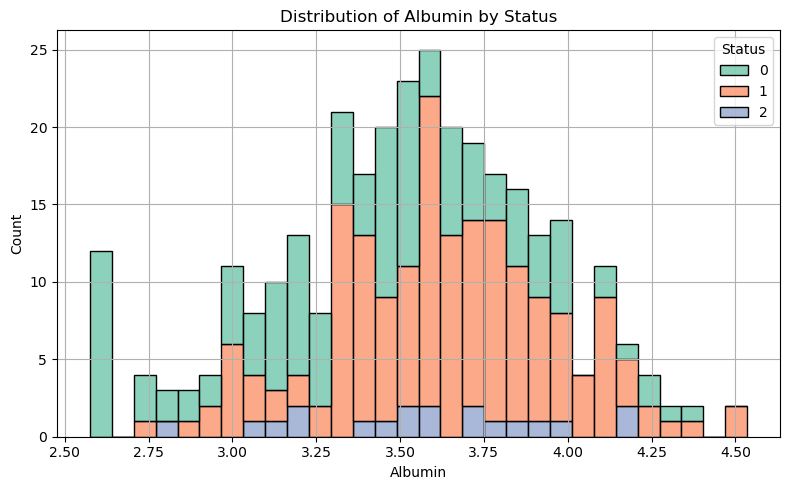

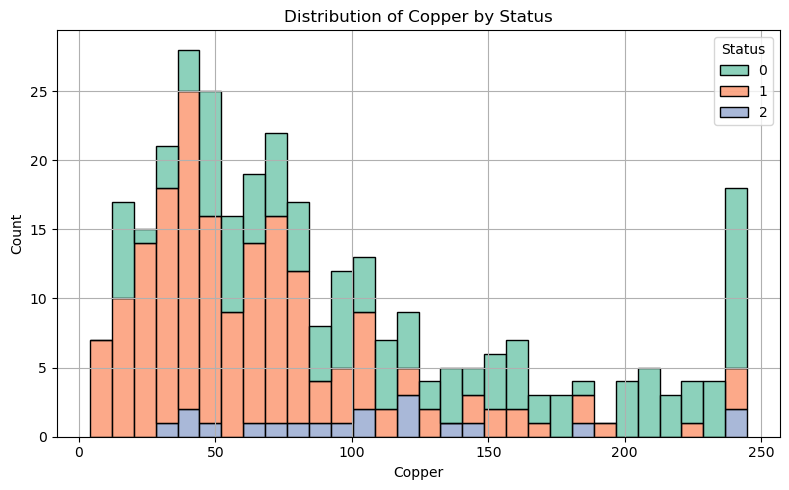

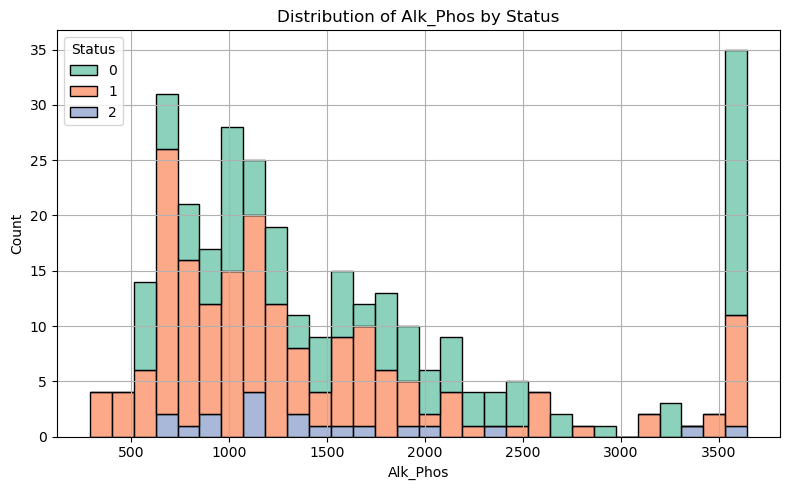

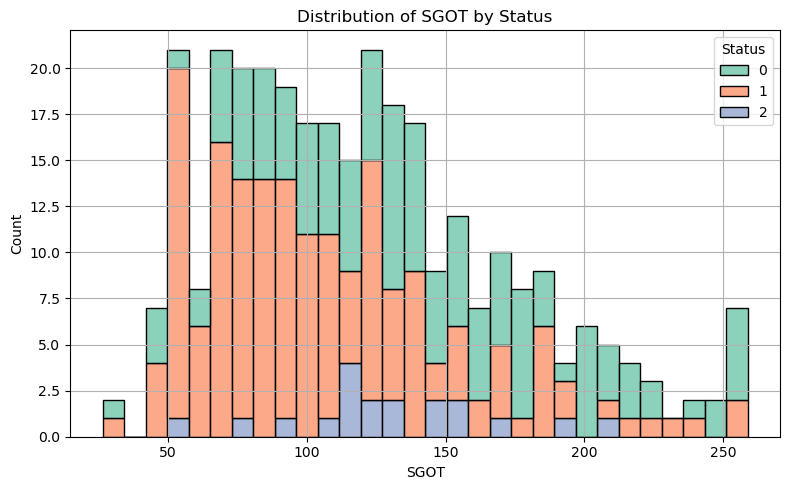

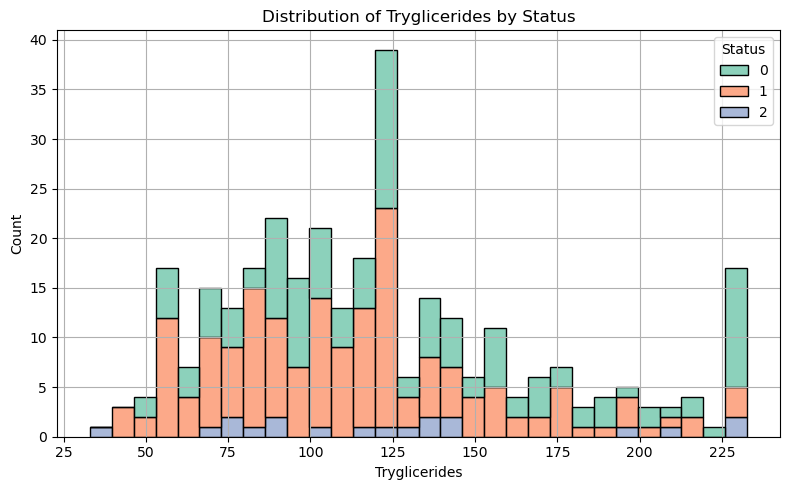

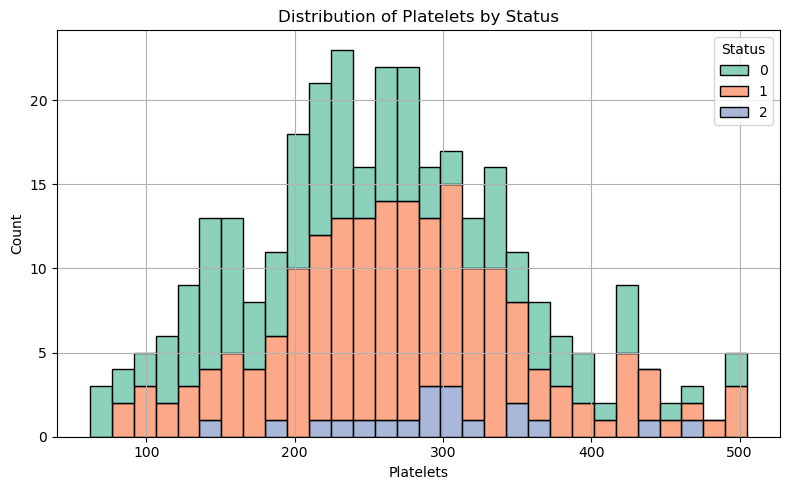

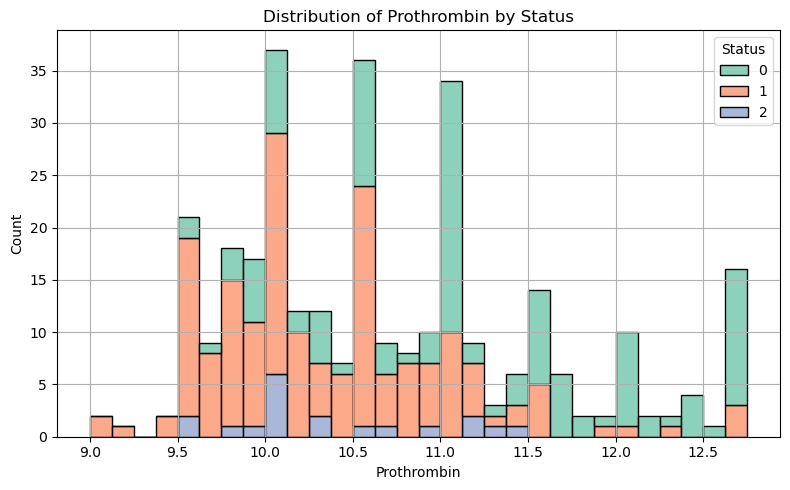

In [533]:
# Plot histograms for each numeric variable, grouped by Status
for var in var_num:
    plt.figure(figsize=(8, 5))

    sns.histplot(
        x=var,
        hue='Status',            # Group by the target variable
        data=db3,
        stat="count",
        multiple="stack",
        bins=30,
        palette="Set2"
    )

    plt.title(f"Distribution of {var} by Status")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

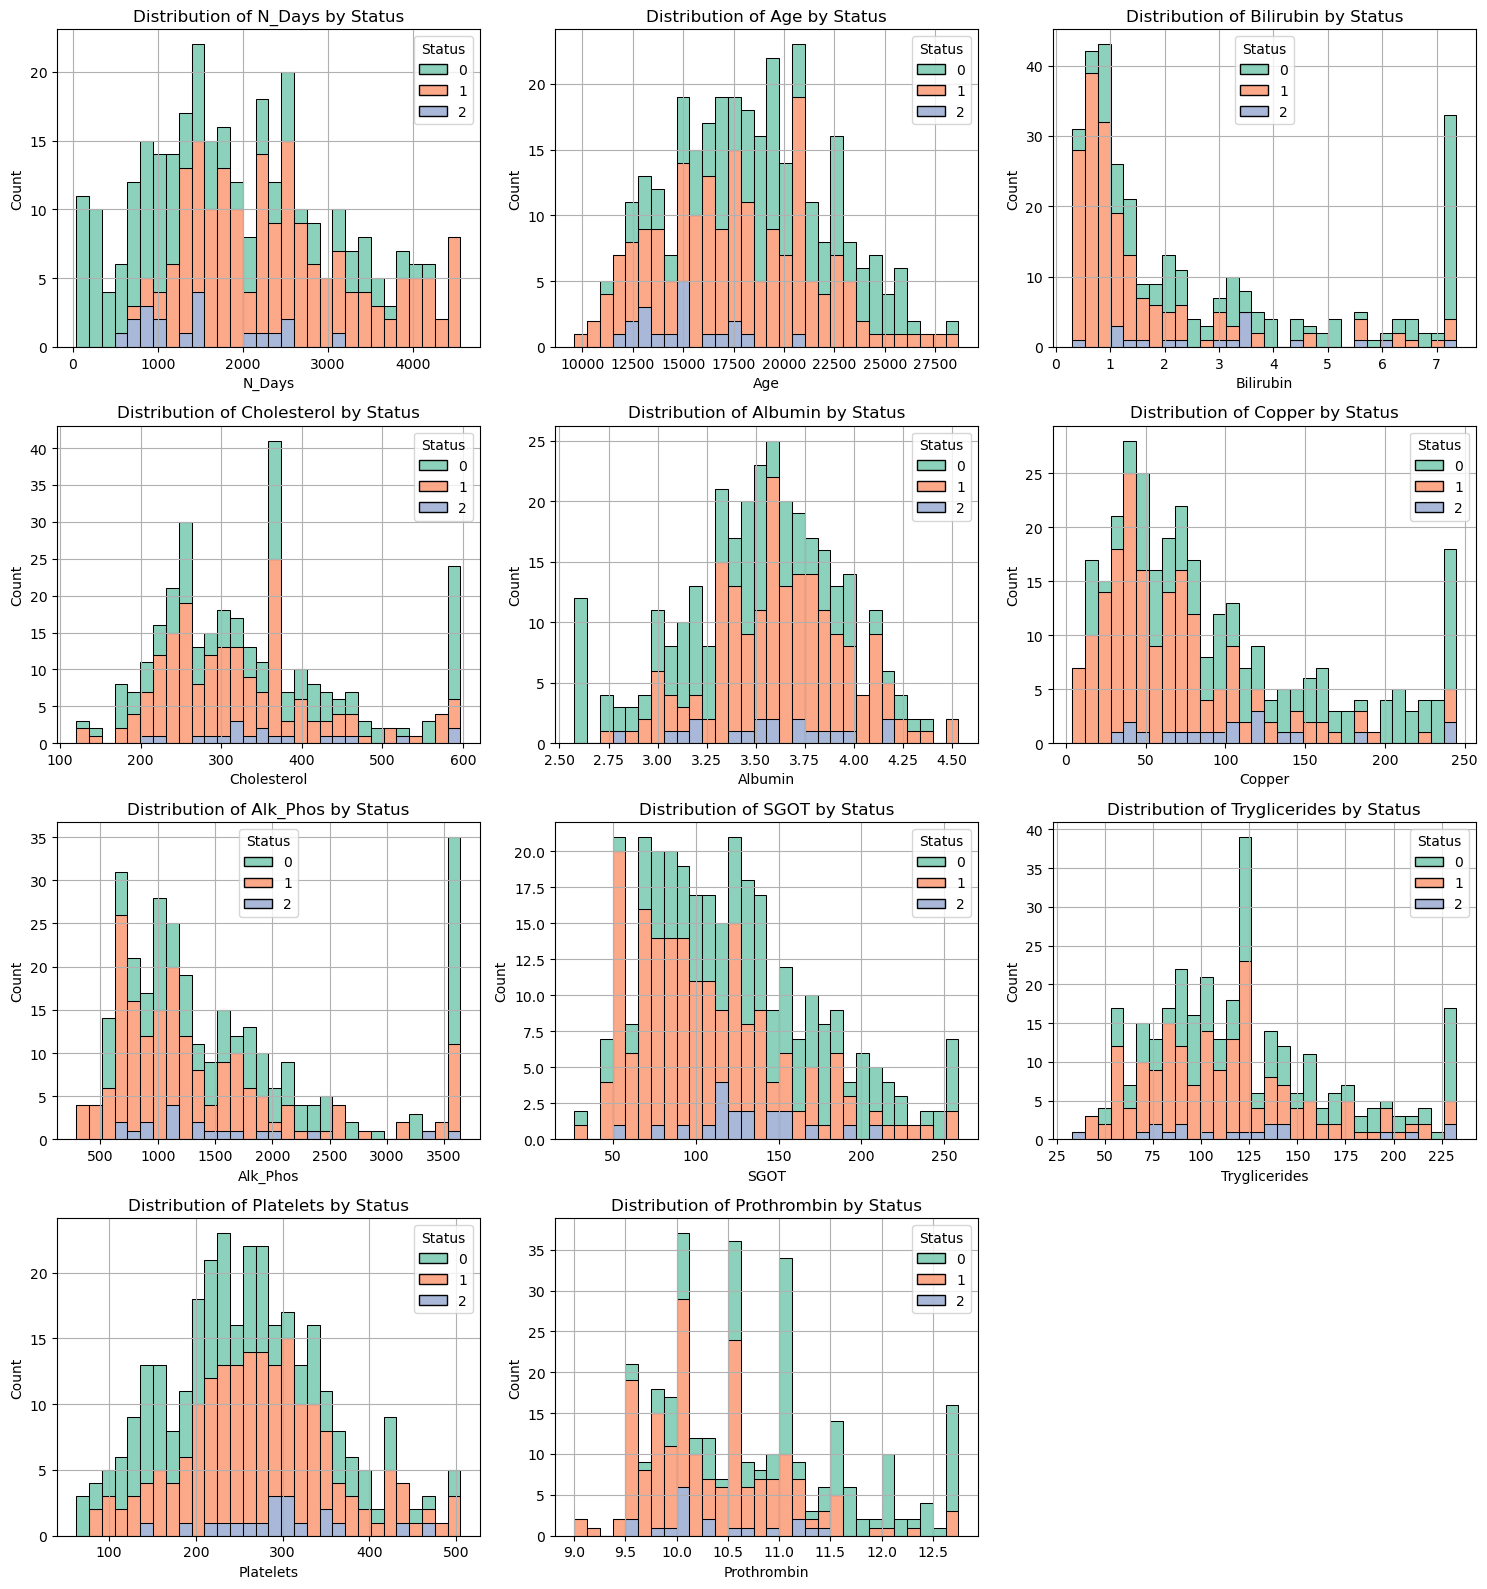

In [534]:
# Alternative: Grid of stacked histograms by Status
cols = 3  # Number of plots per row
rows = math.ceil(len(var_num) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# Create a stacked histogram for each variable
for i, var in enumerate(var_num):
    sns.histplot(
        x=var,
        hue='Status',
        data=db3,
        stat="count",
        multiple="stack",
        bins=30,
        palette="Set2",
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {var} by Status")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Análise de correlação

In [535]:
# Check normal distribution to choose adequate test
# Skewness for numeric variables
from scipy.stats import skew

db3[numeric_vars].skew().sort_values(ascending=False)

# Entre -0.5 e 0.5 → aproximadamente simétrico
# Entre 0.5 e 1 ou -0.5 e -1 → moderadamente enviesado
# Acima de ±1 → fortemente enviesado

Bilirubin        1.120367
Alk_Phos         1.055886
Copper           0.995713
Cholesterol      0.763346
Tryglicerides    0.733224
Prothrombin      0.710806
SGOT             0.697927
N_Days           0.377727
Platelets        0.309281
Age              0.167968
Albumin         -0.289632
dtype: float64

In [536]:
# Shapiro-Wilk for normality testing
from scipy.stats import shapiro

for col in numeric_vars:
    stat, p = shapiro(db3[col])
    print(f"{col}: W = {stat:.3f}, p-value = {p:.3f}")


N_Days: W = 0.972, p-value = 0.000
Age: W = 0.990, p-value = 0.032
Bilirubin: W = 0.790, p-value = 0.000
Cholesterol: W = 0.931, p-value = 0.000
Albumin: W = 0.987, p-value = 0.008
Copper: W = 0.881, p-value = 0.000
Alk_Phos: W = 0.854, p-value = 0.000
SGOT: W = 0.954, p-value = 0.000
Tryglicerides: W = 0.943, p-value = 0.000
Platelets: W = 0.988, p-value = 0.010
Prothrombin: W = 0.943, p-value = 0.000


In [537]:
# Spearman correlation matrix
corr_spearman = db3.drop(columns='ID').corr(method='spearman')
corr_spearman


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,0.332130,0.012421,-0.127200,0.048899,-0.310232,-0.299095,-0.266753,-0.336696,-0.503204,-0.082881,0.433209,-0.430369,-0.039132,-0.279815,-0.167348,0.196262,-0.173222,-0.388597
Status,0.332130,1.000000,-0.017214,-0.285672,0.130526,-0.317301,-0.265330,-0.211808,-0.287155,-0.414007,-0.112747,0.262705,-0.338890,-0.235311,-0.255098,-0.142117,0.202624,-0.434000,-0.273670
Drug,0.012421,-0.017214,1.000000,0.132321,-0.055567,0.044415,-0.102935,-0.008164,0.019133,-0.011438,0.055480,-0.003915,-0.021392,-0.015777,-0.041783,-0.051738,-0.041854,-0.029970,-0.048955
Age,-0.127200,-0.285672,0.132321,1.000000,-0.188967,0.211005,0.084439,-0.051685,0.195246,-0.007983,-0.144513,-0.153801,0.000069,-0.145748,-0.182677,0.024575,-0.143085,0.156141,0.168798
Sex,0.048899,0.130526,-0.055567,-0.188967,1.000000,-0.008688,-0.050949,0.141379,-0.037602,-0.111522,-0.000056,-0.074357,-0.242298,0.004682,-0.020496,-0.088487,0.082762,-0.127818,-0.033464
Ascites,-0.310232,-0.317301,0.044415,0.211005,-0.008688,1.000000,0.161045,0.161339,0.503207,0.267755,-0.103759,-0.323415,0.192134,0.036551,0.084205,0.129809,-0.218890,0.314989,0.269677
Hepatomegaly,-0.299095,-0.265330,-0.102935,0.084439,-0.050949,0.161045,1.000000,0.295054,0.175336,0.390880,0.091753,-0.304142,0.280194,0.165328,0.162120,0.153045,-0.202700,0.221251,0.469257
Spiders,-0.266753,-0.211808,-0.008164,-0.051685,0.141379,0.161339,0.295054,1.000000,0.258339,0.344897,-0.007859,-0.229463,0.266356,0.093539,0.155258,-0.008723,-0.156159,0.243157,0.297879
Edema,-0.336696,-0.287155,0.019133,0.195246,-0.037602,0.503207,0.175336,0.258339,1.000000,0.293041,-0.130921,-0.320991,0.192856,0.035508,0.105585,0.050741,-0.223123,0.347469,0.249255
Bilirubin,-0.503204,-0.414007,-0.011438,-0.007983,-0.111522,0.267755,0.390880,0.344897,0.293041,1.000000,0.374362,-0.367095,0.623180,0.357236,0.585156,0.340570,-0.209761,0.299138,0.393026


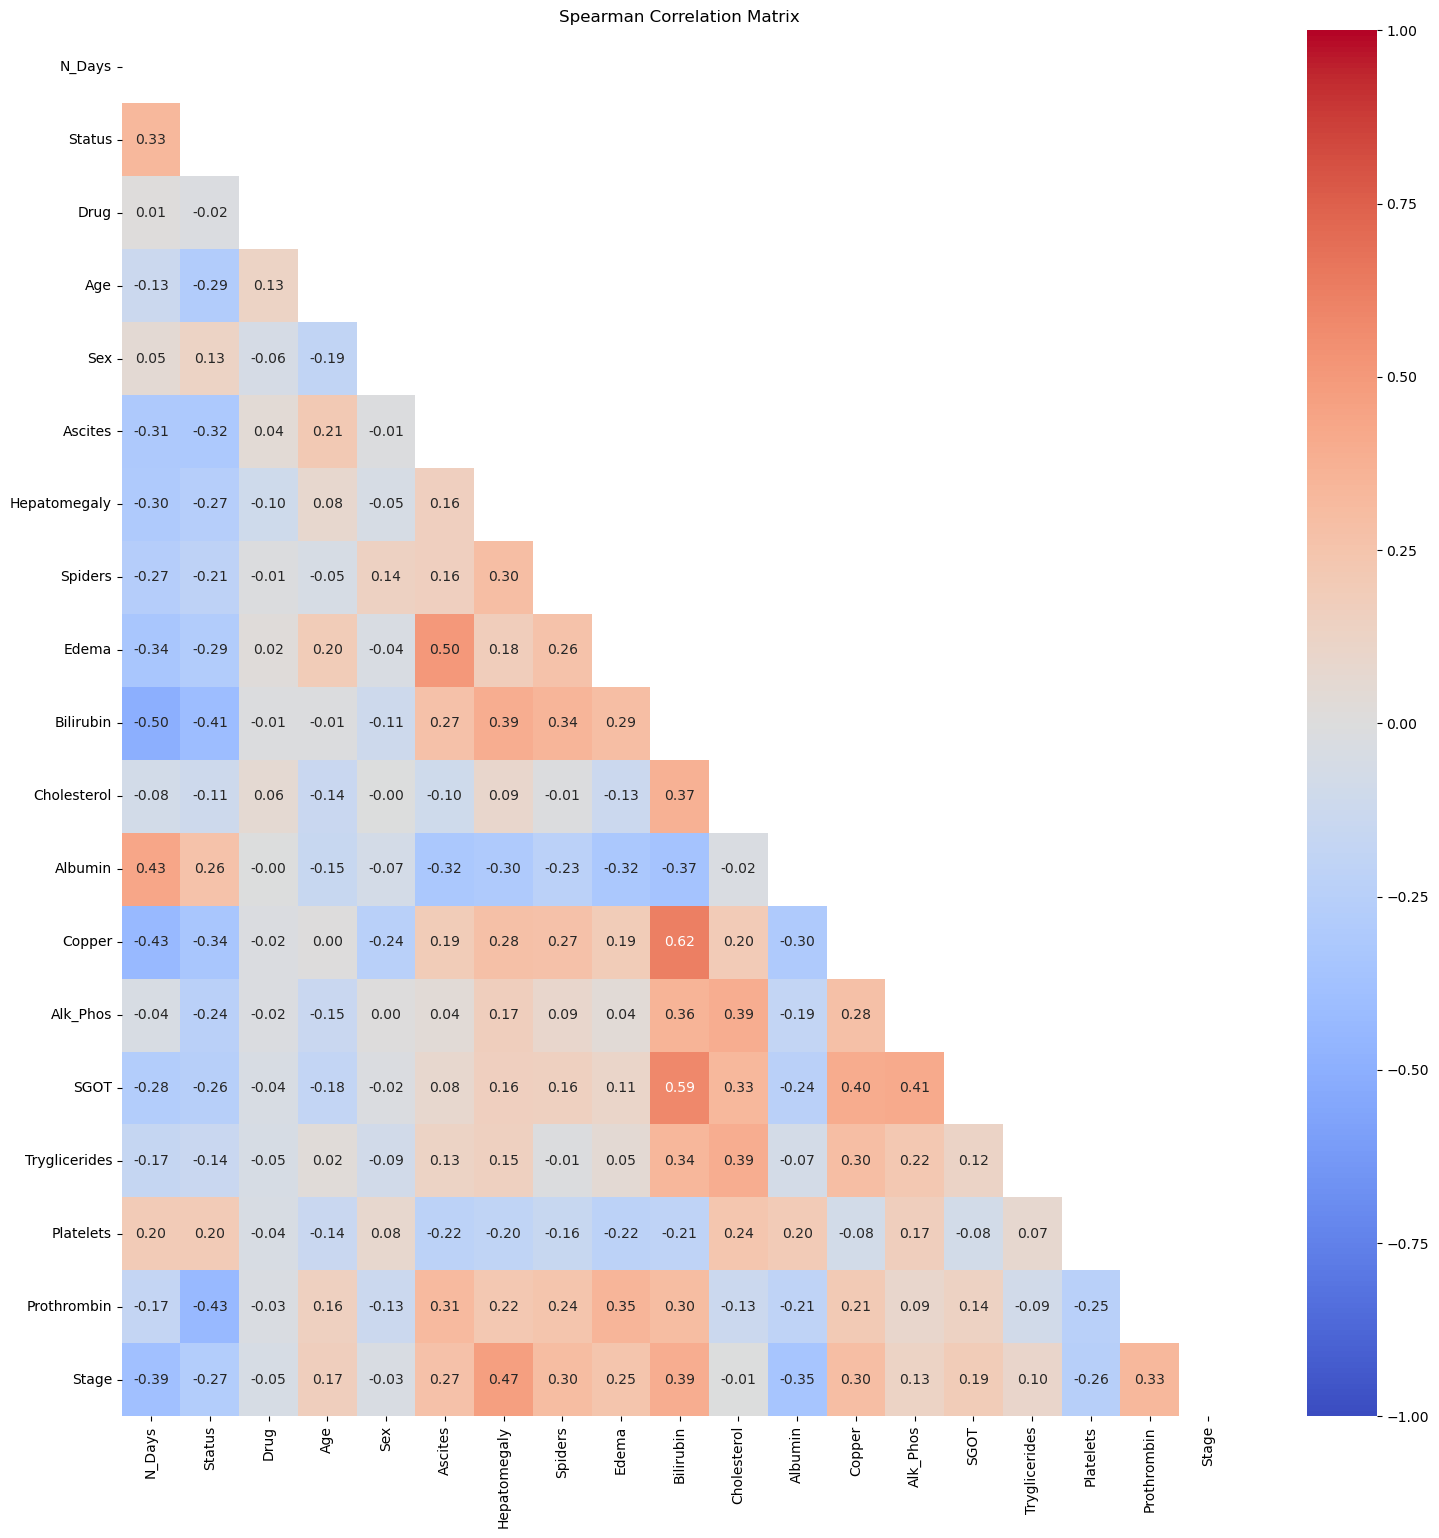

In [538]:
# Plot heatmap, masking upper triangle
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

plt.figure(figsize=(18, 18))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Matrix")
plt.show()

In [539]:
#Identificar pares de variáveis fortemente correlacionadas (|ρ| ≥ 0.7)
corr_matrix_abs = corr_spearman.abs()
s = corr_matrix_abs.unstack().sort_values(ascending=False)
strong_corr = s[(s >= 0.7) & (s < 1)]

# Convert to DataFrame
strong_corr_df = strong_corr.reset_index()
strong_corr_df.columns = ['Variable 1', 'Variable 2', 'Corr_Spearman']
strong_corr_df


,Variable 1,Variable 2,Corr_Spearman


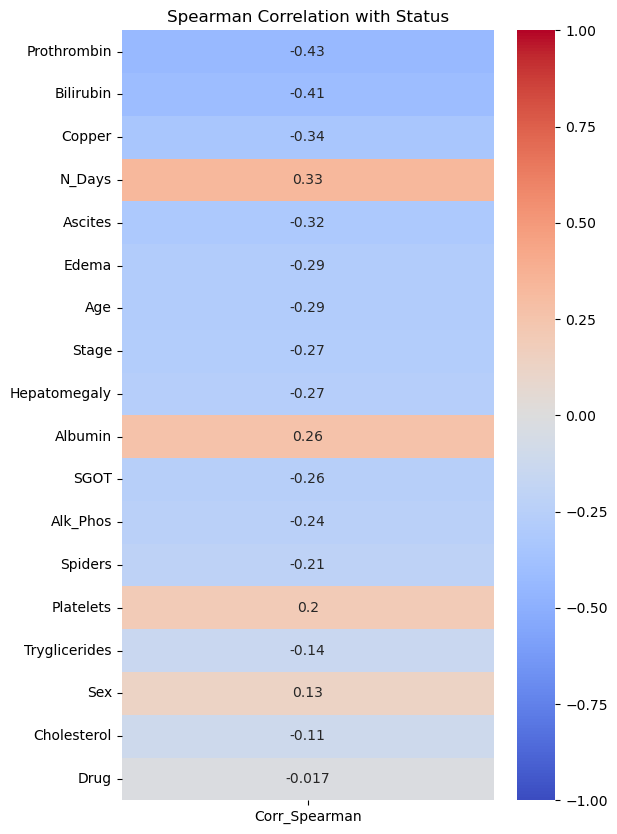

In [540]:
# Correlation of variables with the target (excluding ID)
# Used to help decide which highly correlated variables to remove (keep the one most correlated with the target)
corr_with_target = db3.corrwith(db3['Status'], method='spearman').drop(labels=['Status', 'ID'])

correlation_df = corr_with_target.abs().sort_values(ascending=False).to_frame(name='|Corr|')
correlation_df['Corr_Spearman'] = corr_with_target
correlation_df = correlation_df[['Corr_Spearman', '|Corr|']]

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(correlation_df[['Corr_Spearman']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation with Status")
plt.show()


In [541]:
# Manual removal of strongly correlated variables
# View high correlations
display(strong_corr_df)


# Example: drop variables manually
# db3 = db3.drop(columns=['Alk_Phos', 'Tryglicerides'])


,Variable 1,Variable 2,Corr_Spearman


## Automatic EDA 

### Sweetviz
https://pypi.org/project/sweetviz/

In [544]:
import sweetviz as sv

In [546]:
my_report = sv.analyze(db)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Ydata profiling (antigo pandas profiling)
https://github.com/ydataai/ydata-profiling

In [547]:
from ydata_profiling import ProfileReport

In [549]:
profile = ProfileReport(db, title="Profiling Report")
profile
profile.to_file("hipo.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 995.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]